# Figures

This notebook contains the code necessary to most of the figures for the Ancient Genotyped Variants Proxy Catalog project. I have organized sections by order of appearance in the manuscript. Use the Table of Contents below to navigate to specific plots.

## Table of Contents

- [Notebook Setup](#notebooksetup)
- [Proportion TopLD Variants Among MAF Classes](#proportiontopldvariantsamongmafclasses)
- [TopLD Variants in LD with AGVs](#topldvariantsinldwithagvs)
    - [Common Variant Proportions](#commonvariantproportions)
    - [Proportions per Ancestry Group by MAF](#proportionsperancestrygroupbyMAF)
- [Evaluation](#evaluation)
    - [Mismatch Proportions by LD Threshold](#mismatchesbythreshold)
    - [Mismatches by Genomic Window](#mismatchesbywindow)
- [AGV and LD Variants GWAS Intersect](#gwasintersect)
- [AGVs in TopLD](#agvsintopld)
    - [AGVs TopLD Presence by Ancestry Group](#agvstopldpresencebyancestrygroup)
    - [AGV Alleles Frequencies](#agvallelefrequencies)
    - [AGV Allele Frequencies by TopLD Presence/Absence](#agvallelefrequenciesbytopldpresenceabsence)
- [AGV Age Estimates](#agvagestimates)
- [Allele Frequency Trajectory Examples](#allelefrequencytrajectoryexamples)
- [Selection GWAS Loci Allele Frequency Trajectories](#gwastrajectories)
- [HGD Quality Scores vs. Allele Age](#hgdqualityscoresvsalleleage)
- [HGD Allele Age by Data Source](#hgdalleleagebydatasource)

## Notebook Setup <a class = 'anchor' id = 'notebooksetup'></a>

Load libraries, set up Arial font, themes, and the recurring ancestry group palette.

In [1]:
library(ComplexUpset)
library(cowplot)
library(dplyr)
library(ggplot2)
library(hexbin)
library(readr)
library(scales)
library(showtext)
library(data.table)
library(tidyr)

options(scipen=999)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: sysfonts

Loading required package: showtextdb


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
setwd('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog')

In [3]:
font_add('Arial', '~/fonts/arial.ttf')
showtext_auto()
showtext_opts(dpi = 300)

In [4]:
fig_theme = theme_classic() +
    theme(axis.line.x.bottom = element_line(size = (0.125/0.377)),
          axis.line.y.left = element_line(size = (0.125/0.377)),
          axis.text.x = element_text(size = 11),
          axis.text.y = element_text(size = 11),
          axis.ticks = element_line(size = (0.125/0.377)),
          axis.title = element_text(size = 12),
          axis.title.x = element_text(margin = margin(b = 0, l = 0, r = 0, t = 15)),
          axis.title.y = element_text(margin = margin(b = 0, l = 0, r = 15, t = 0,)),
          legend.position = 'none',
          text = element_text(family = 'Arial')
         )

In [5]:
AFR_color <- '#ffcc00'
EAS_color <- '#00aad4'
EUR_color <- '#a02c89'
SAS_color <- '#5a2ca0'

## Proportion TopLD Variants Among MAF Classes <a class = 'anchor' id = 'proportiontopldvariantsamongmafclasses'></a>

In [6]:
proportion_TopLD_variants_per_ancestry_group_per_MAF_class <- read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/TopLD/proportion_TopLD_variants_per_ancestry_group_per_MAF_class.txt', sep = '\t', header = TRUE)
proportion_TopLD_variants_per_ancestry_group_per_MAF_class$ancestry_group <- factor(proportion_TopLD_variants_per_ancestry_group_per_MAF_class$ancestry_group, levels = c('SAS','EAS','AFR','EUR'))
proportion_TopLD_variants_per_ancestry_group_per_MAF_class$MAF_class <- factor(proportion_TopLD_variants_per_ancestry_group_per_MAF_class$MAF_class, levels = c('UR','R','LF','C'))
proportion_TopLD_variants_per_ancestry_group_per_MAF_class$color_ID <- c('A','B','C','D','E','F','G','H','I','J','K','L','M','N','O')
proportion_TopLD_variants_per_ancestry_group_per_MAF_class

ancestry_group MAF_class proportion color_ID
1  AFR            UR        0.512049   A       
2  AFR            R         0.230152   B       
3  AFR            LF        0.113081   C       
4  AFR            C         0.144717   D       
5  EAS            UR        0.530110   E       
6  EAS            R         0.248446   F       
7  EAS            C         0.159941   G       
8  EAS            LF        0.061503   H       
9  EUR            UR        0.897654   I       
10 EUR            R         0.043853   J       
11 EUR            LF        0.017851   K       
12 EUR            C         0.040642   L       
13 SAS            R         0.579107   M       
14 SAS            LF        0.135477   N       
15 SAS            C         0.285416   O

In [7]:
colors <- c('#fff6d5',
            '#ffeeaa',
            '#ffdd55',
            '#ffcc00',
            '#d5f6ff',
            '#aaeeff',
            '#2ad4ff',
            '#00aad4',
            '#f4d7ee',
            '#e9afdd',
            '#d35fbc',
            '#a02c89',
            '#c6afe9',
            '#8d5fd3',
            '#612daf'
           )

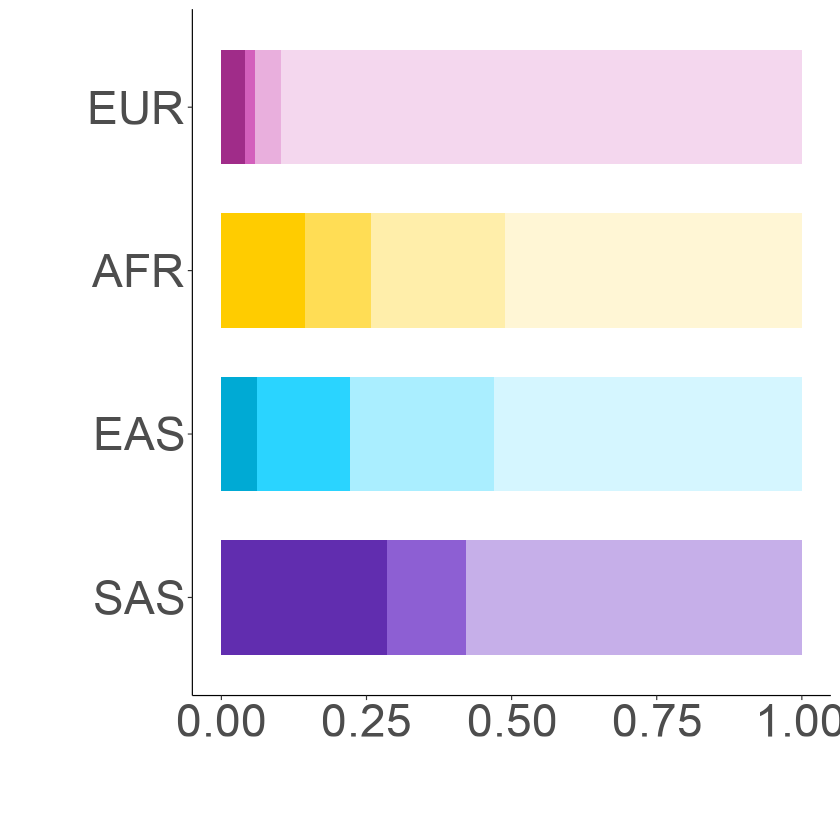

In [8]:
proportion_TopLD_variants_per_ancestry_group_per_MAF_class_plot <- ggplot(proportion_TopLD_variants_per_ancestry_group_per_MAF_class, aes(
    x = proportion,
    y = ancestry_group,
    fill = color_ID
)) +
    geom_bar(stat = 'identity', width = 0.7) +
    scale_fill_manual(values = colors) +
    xlab('') +
    ylab('') +
    fig_theme

proportion_TopLD_variants_per_ancestry_group_per_MAF_class_plot

R is not ordering low-frequency and common variants correctly in the plot. Let's manually re-order the dataframe and replot.

In [9]:
proportion_TopLD_variants_per_ancestry_group_per_MAF_class$MAF_class <- c('UR','R','LF','C',
                                                                          'UR','R','LF','C',
                                                                          'UR','R','LF','C',
                                                                          'R','LF','C'
                                                                         )

proportion_TopLD_variants_per_ancestry_group_per_MAF_class$proportion <- c(0.512049,0.230152,0.113081,0.144717,
                                                                           0.530110,0.248446,0.061503,0.159941,
                                                                           0.897654,0.043853,0.017851,0.040642,
                                                                           0.579107,0.135477,0.285416
                                                                          )

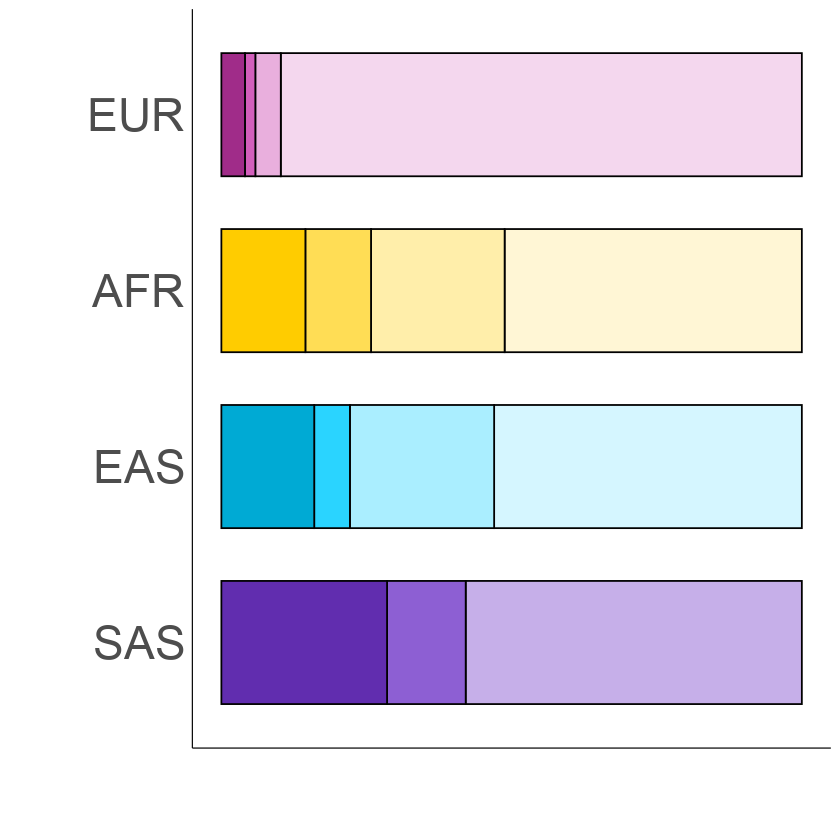

In [10]:
proportion_TopLD_variants_per_ancestry_group_per_MAF_class_plot <- ggplot(proportion_TopLD_variants_per_ancestry_group_per_MAF_class, aes(
    x = proportion,
    y = ancestry_group,
    fill = color_ID
)) +
    geom_bar(color = 'black', stat = 'identity', width = 0.7) +
    scale_fill_manual(values = colors) +
    xlab('') +
    ylab('') +
    fig_theme +
    theme(axis.text.x = element_blank(),
          axis.ticks.x = element_blank(),
          axis.ticks.y = element_blank()
    )

proportion_TopLD_variants_per_ancestry_group_per_MAF_class_plot

In [11]:
pdf('figures/main_fig_components/proportion_TopLD_variants_per_ancestry_group_per_MAF_class.pdf', height = 6, width = 6)
proportion_TopLD_variants_per_ancestry_group_per_MAF_class_plot
dev.off()

png 
  2

## TopLD Variants in LD with AGVs <a class = 'anchor' id = 'topldvariantsinldwithagvs'></a>

In [12]:
proportion_TopLD_variants_in_LD_with_AGVs = read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/AGV_LD_variants/proportion_TopLD_variants_in_LD_with_AGVs.txt', sep = '\t', header = TRUE)
head(proportion_TopLD_variants_in_LD_with_AGVs)

ancestry_group MAF_class R2  proportion
1 AFR            UR        0.2 0.03529322
2 AFR            R         0.2 0.10720822
3 AFR            LF        0.2 0.43676849
4 AFR            C         0.2 0.88375901
5 EAS            UR        0.2 0.06694301
6 EAS            R         0.2 0.12711107

### Common Variant Proportions <a class = 'anchor' id = 'commonvariantproportions'></a>

In [13]:
x_axis_label <- bquote(paste('Minimum R'^'2',' between Modern Variants and AGVs'))

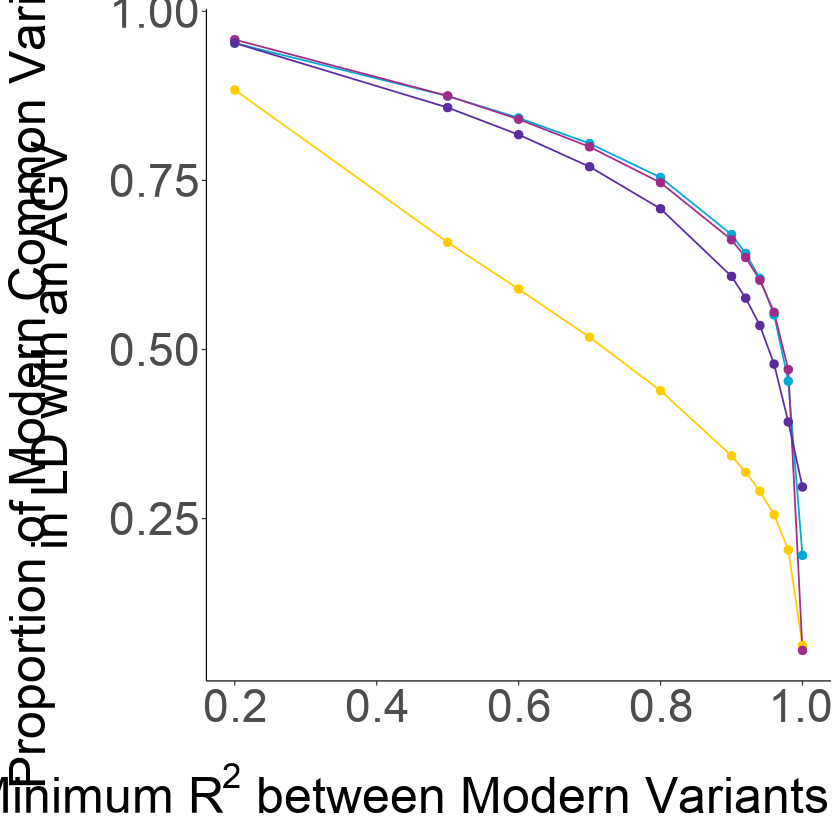

In [14]:
proportion_TopLD_common_variants_in_LD_with_AGV_plot <- ggplot(subset(proportion_TopLD_variants_in_LD_with_AGVs, MAF_class == 'C'), aes(
    x = R2,
    y = proportion,
    color = ancestry_group
)) + 
    geom_line(show.legend = F) +
    geom_point(size = 2) +
    scale_color_manual(values = c(AFR_color,EAS_color,EUR_color,SAS_color)) +
    xlab(x_axis_label) +
    ylab('Proportion of Modern Common Variants\nin LD with an AGV') + 
    fig_theme

proportion_TopLD_common_variants_in_LD_with_AGV_plot 

### Proportions per Ancestry Group by MAF <a class = 'anchor' id = 'proportionsperancestrygroupbyMAF'></a>

In [15]:
plot_for_legend <- ggplot(data = subset(proportion_TopLD_variants_in_LD_with_AGVs, ancestry_group == 'AFR'), aes(
    x = R2,
    y = proportion,
    linetype = MAF_class
)) + 
    geom_line(color = 'black') +
    geom_point(color = 'black', show.legend = F, size = 2) +
    scale_linetype_manual(labels = c('Common','Low-frequency','Rare','Ultra-rare'), 
                          values = c('solid','longdash','dashed','dotted')) + 
    coord_cartesian(ylim = c(0,1)) +
    xlab(x_axis_label) +
    ylab('Proportion of Modern Variants in LD with an AGV') + 
    theme_classic() +
    theme(axis.line.x.bottom = element_line(size = (0.125/0.377)),
          axis.line.y.left = element_line(size = (0.125/0.377)),
          axis.text.x = element_text(size = 11),
          axis.text.y = element_text(size = 11),
          axis.ticks = element_line(size = (0.125/0.377)),
          axis.title = element_text(size = 12),
          axis.title.x = element_text(margin = margin(b = 0, l = 0, r = 0, t = 15)),
          axis.title.y = element_text(margin = margin(b = 0, l = 0, r = 15, t = 0)),
          legend.position = 'bottom',
          legend.spacing.x = unit(0.2, 'cm'),
          legend.text = element_text(family = 'Arial', margin = margin(r = 15, unit = 'pt'), size = 11),
          legend.title = element_blank(), text = element_text(family = 'Arial')
    )

legend <- get_legend(plot_for_legend)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

In [16]:
proportion_TopLD_variants_in_LD_with_AGVs_per_ancestry_group_by_MAF_plot <- function(group, color, linetypes) {
    ggplot(data = subset(proportion_TopLD_variants_in_LD_with_AGVs, ancestry_group == group), aes(
        x = R2,
        y = proportion,
        linetype = MAF_class
    )) + 
        geom_line(color = color) +
        geom_point(color = color, show.legend = F, size = 2) +
        scale_linetype_manual(values = linetypes) +
        coord_cartesian(ylim = c(0,1)) +
        fig_theme +
        theme(axis.title.x = element_blank(),
              axis.title.y = element_blank()
        )
}

In [17]:
AFR_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot <- proportion_TopLD_variants_in_LD_with_AGVs_per_ancestry_group_by_MAF_plot('AFR',AFR_color,c('solid','longdash','dashed','dotted'))
EAS_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot <- proportion_TopLD_variants_in_LD_with_AGVs_per_ancestry_group_by_MAF_plot('EAS',EAS_color,c('solid','longdash','dashed','dotted'))
EUR_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot <- proportion_TopLD_variants_in_LD_with_AGVs_per_ancestry_group_by_MAF_plot('EUR',EUR_color,c('solid','longdash','dashed','dotted'))
SAS_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot <- proportion_TopLD_variants_in_LD_with_AGVs_per_ancestry_group_by_MAF_plot('SAS',SAS_color,c('solid','longdash','dashed','dotted'))

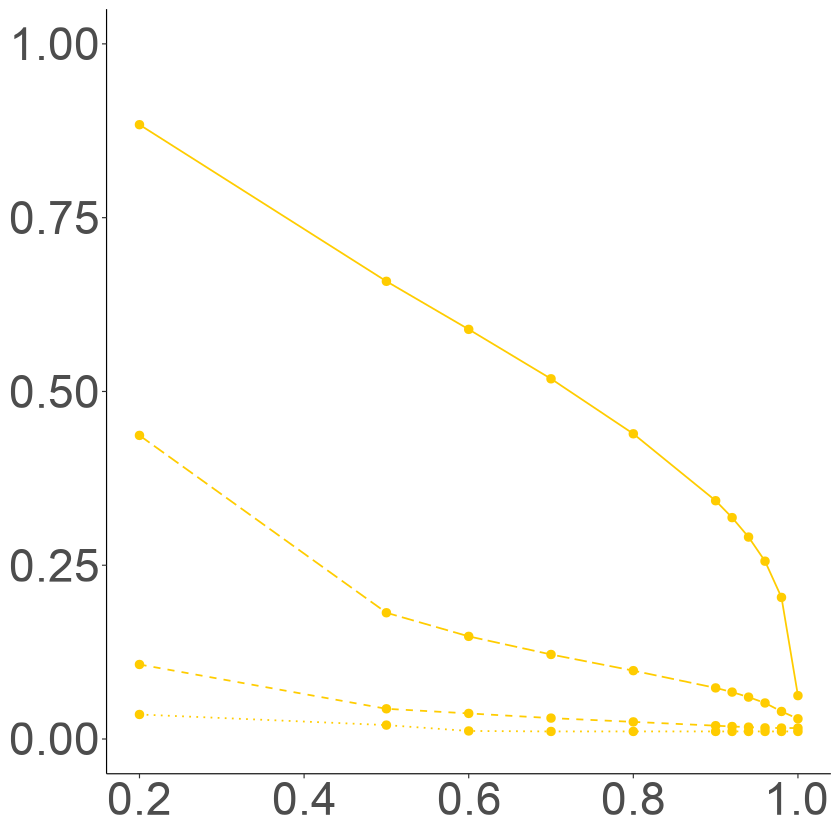

In [18]:
AFR_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot

In [19]:
x_axis_label = ggdraw() + 
    draw_label(x_axis_label,
               fontfamily = 'Arial',
               hjust = 0.5,
               size = 12
              )

y_axis_label = ggdraw() +
    draw_label('Proportion of Modern Variants\nin LD with an AGV',
               angle = 90,
               fontfamily = 'Arial',
               hjust = 0.5,
               size = 12,
               x = 0.5
              )

inner_left <- plot_grid(AFR_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot,
                        NULL,
                        EUR_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot,
                        ncol = 1,
                        rel_heights = c(0.48,0.04,0.48)
                       )

inner_right <- plot_grid(EAS_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot,
                         NULL,
                         SAS_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot,
                         ncol = 1,
                         rel_heights = c(0.48,0.04,0.48)
                        )

inner <- plot_grid(inner_left,
                   NULL,
                   inner_right,
                   nrow = 1,
                   rel_widths = c(0.48,0.04,0.48)
                  )

inner_with_x <- plot_grid(inner,
                          NULL,
                          x_axis_label,
                          NULL,
                          legend,
                          ncol = 1,
                          rel_heights = c(0.84,0.02,0.08,0.01,0.06)
                         )

inner_with_both <- plot_grid(y_axis_label,
                             inner_with_x,
                             nrow = 1,
                             rel_widths = c(0.15,1)
                            )

Warning message:
“Removed 11 row(s) containing missing values (geom_path).”
Warning message:
“Removed 11 rows containing missing values (geom_point).”


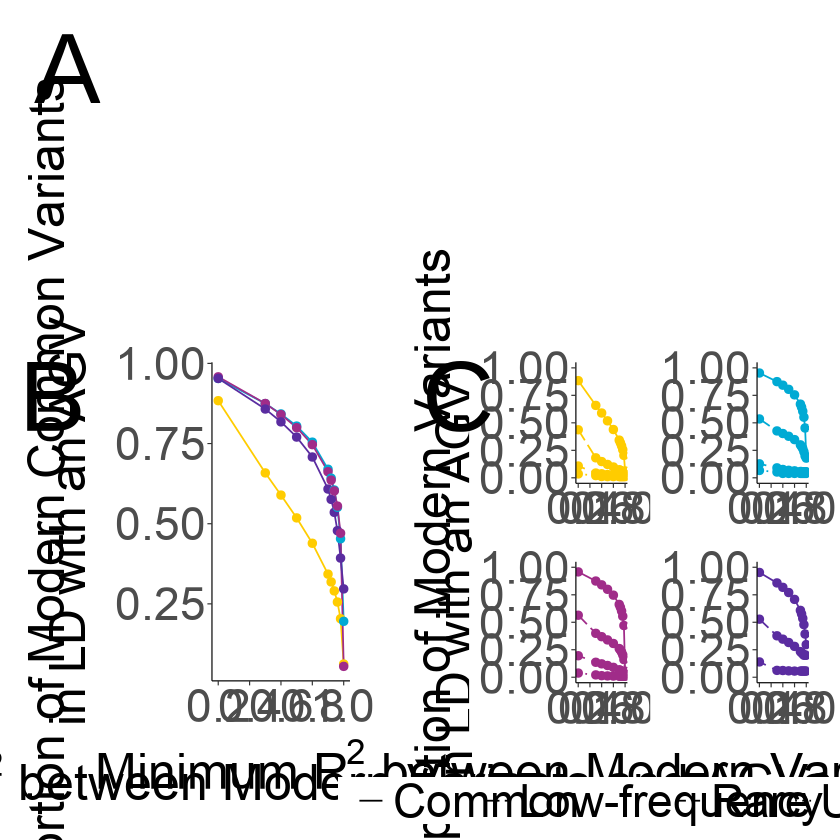

In [20]:
bottom_row <- plot_grid(proportion_TopLD_common_variants_in_LD_with_AGV_plot,
                        NULL,
                        inner_with_both,
                        label_fontface = 'plain',
                        label_size = 24,
                        labels = c('B','','C'),
                        nrow = 1,
                        rel_widths = c(0.45,0.02,0.53),
                        scale = 0.9
                       )

proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot <- plot_grid(NULL,
                                                                   bottom_row,
                                                                   label_fontface = 'plain',
                                                                   label_size = 24,
                                                                   labels = c('A'),
                                                                   ncol = 1,
                                                                   rel_heights = c(0.39,0.61)
                                                                  )

proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot

In [21]:
pdf('figures/main_fig_components/proportion_TopLD_variants_in_LD_with_AGVs_by_MAF.pdf', height = 8, width = 10)
proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot
dev.off()

png 
  2

## Evaluation <a class = 'anchor' id = 'evaluation'></a>

### Mismatch Proportions by LD Threshold <a class = 'anchor' id = 'mismatchesbythreshold'></a>

In [22]:
Loschbour_eval_stats = read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/evaluation/Loschbour_evaluation_statistics.txt', sep = '\t', header = FALSE)
colnames(Loschbour_eval_stats) <- c('LD_threshold','chr','N_partial_matches','N_complete_matches','N_evaluated')
Loschbour_eval_stats <- Loschbour_eval_stats %>% 
    group_by(LD_threshold) %>% 
    summarize(total_partial_matches = sum(N_partial_matches, na.rm = TRUE), total_complete_matches = sum(N_complete_matches, na.rm = TRUE), total_evaluated = sum(N_evaluated, na.rm = TRUE), .groups = "drop") %>%
    mutate(partial_matches_prop = total_partial_matches / total_evaluated, complete_matches_prop = total_complete_matches / total_evaluated)
Loschbour_eval_stats <- Loschbour_eval_stats %>% select(LD_threshold, partial_matches_prop, complete_matches_prop) %>%
  pivot_longer(cols = c(partial_matches_prop, complete_matches_prop), names_to = "match_type", values_to = "prop") %>%
  mutate(match_type = case_when(match_type == "partial_matches_prop" ~ "Partial Matches", match_type == "complete_matches_prop" ~ "Complete Matches"))
Loschbour_eval_stats

LD_threshold match_type       prop     
1  0.5          Partial Matches  0.9930215
2  0.5          Complete Matches 0.9466220
3  0.6          Partial Matches  0.9959556
4  0.6          Complete Matches 0.9634882
5  0.7          Partial Matches  0.9979629
6  0.7          Complete Matches 0.9773031
7  0.8          Partial Matches  0.9991380
8  0.8          Complete Matches 0.9874773
9  0.9          Partial Matches  0.9997109
10 0.9          Complete Matches 0.9947841

In [23]:
Ust_Ishim_eval_stats = read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/evaluation/Ust_Ishim_evaluation_statistics.txt', sep = '\t', header = FALSE)
colnames(Ust_Ishim_eval_stats) <- c('LD_threshold','chr','N_partial_matches','N_complete_matches','N_evaluated')
Ust_Ishim_eval_stats <- Ust_Ishim_eval_stats %>% 
    group_by(LD_threshold) %>% 
    summarize(total_partial_matches = sum(N_partial_matches, na.rm = TRUE), total_complete_matches = sum(N_complete_matches, na.rm = TRUE), total_evaluated = sum(N_evaluated, na.rm = TRUE), .groups = "drop") %>%
    mutate(partial_matches_prop = total_partial_matches / total_evaluated, complete_matches_prop = total_complete_matches / total_evaluated)
Ust_Ishim_eval_stats <- Ust_Ishim_eval_stats %>% select(LD_threshold, partial_matches_prop, complete_matches_prop) %>%
  pivot_longer(cols = c(partial_matches_prop, complete_matches_prop), names_to = "match_type", values_to = "prop") %>%
  mutate(match_type = case_when(match_type == "partial_matches_prop" ~ "Partial Matches", match_type == "complete_matches_prop" ~ "Complete Matches"))
Ust_Ishim_eval_stats

LD_threshold match_type       prop     
1  0.5          Partial Matches  0.9880246
2  0.5          Complete Matches 0.9006504
3  0.6          Partial Matches  0.9917226
4  0.6          Complete Matches 0.9226723
5  0.7          Partial Matches  0.9948614
6  0.7          Complete Matches 0.9436364
7  0.8          Partial Matches  0.9973515
8  0.8          Complete Matches 0.9616686
9  0.9          Partial Matches  0.9988684
10 0.9          Complete Matches 0.9782681

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

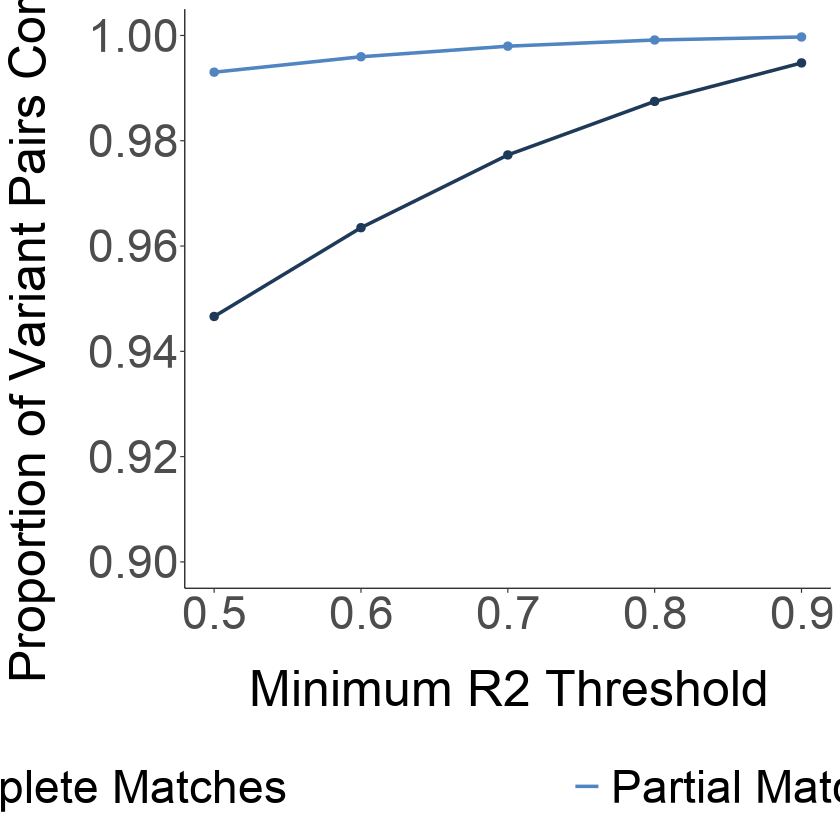

In [24]:
plot_for_legend <- ggplot(Loschbour_eval_stats, aes(
    x = LD_threshold,
    y = prop,
    color = match_type,
    group = match_type
)) +
    geom_point(show.legend = F, size = 2) +
    geom_line(size = 1) +
    scale_color_manual(values = c('Complete Matches' = '#1f3a59', 'Partial Matches' = '#5085c2')) +
    scale_y_continuous(breaks = seq(0, 1, 0.02)) +
    coord_cartesian(ylim = c(0.9,1)) +
    xlab('Minimum R2 Threshold') +
    ylab('Proportion of Variant Pairs Correct') +
    fig_theme +
    theme_classic() +
    theme(axis.line.x.bottom = element_line(size = (0.125/0.377)),
          axis.line.y.left = element_line(size = (0.125/0.377)),
          axis.title = element_text(size = 12),
          axis.text.x = element_text(size = 11),
          axis.text.y = element_text(size = 11),
          axis.ticks = element_line(size = (0.125/0.377)),
          axis.title.x = element_text(margin = margin(b = 0, l = 0, r = 0, t = 15)),
          axis.title.y = element_text(margin = margin(b = 0, l = 0, r = 15, t = 0)),
          legend.position = 'bottom',
          legend.spacing.x = unit(0.2, 'cm'),
          legend.text = element_text(family = 'Arial', margin = margin(r = 15, unit = 'pt'), size = 11),
          legend.title = element_blank(), text = element_text(family = 'Arial')
    )

plot_for_legend
legend <- get_legend(plot_for_legend)

In [25]:
evaluation_success_plot <- function(data, title) {
    ggplot(data, aes(
        x = LD_threshold,
        y = prop,
        color = match_type,
        group = match_type
    )) +
        geom_point(size = 2) +
        geom_line(size = 1) +
        scale_color_manual(values = c('Complete Matches' = '#1f3a59', 'Partial Matches' = '#5085c2')) +
        scale_y_continuous(breaks = seq(0, 1, 0.02)) +
        coord_cartesian(ylim = c(0.9,1)) +
        ggtitle(title) +
        xlab('Minimum R2 Threshold') +
        ylab('Proportion of Variant Pairs Correct') +
        fig_theme +
        theme(plot.title = element_text(family = 'Arial', hjust = 0.5, margin = margin(b = 30, l = 0, r = 0, t = 0), size = 12))
}

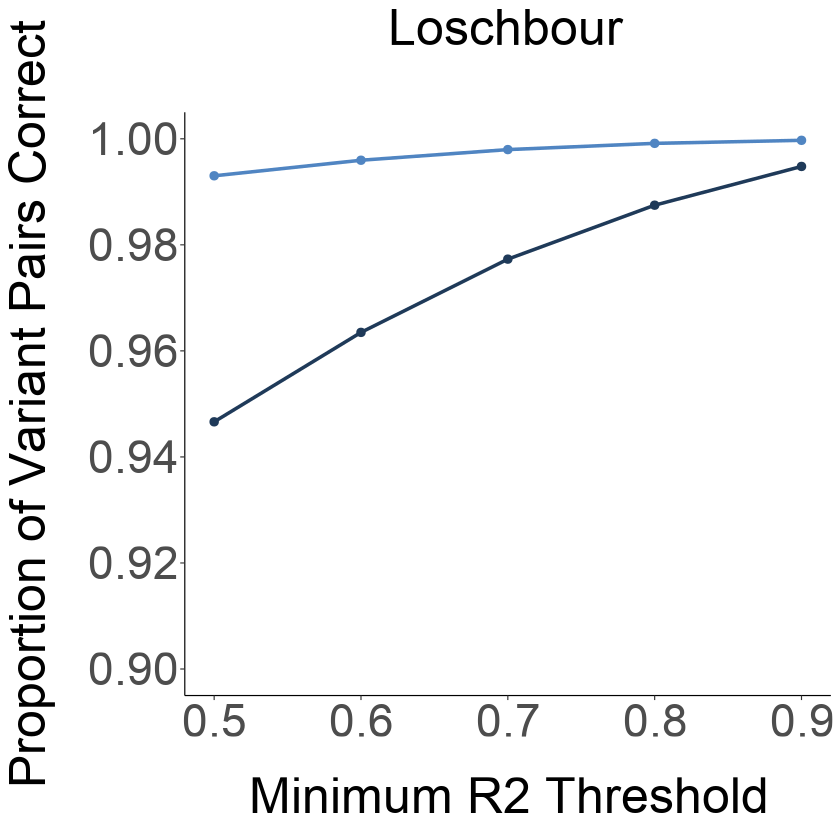

In [26]:
Loschbour_eval_plot <- evaluation_success_plot(Loschbour_eval_stats, 'Loschbour')
Loschbour_eval_plot

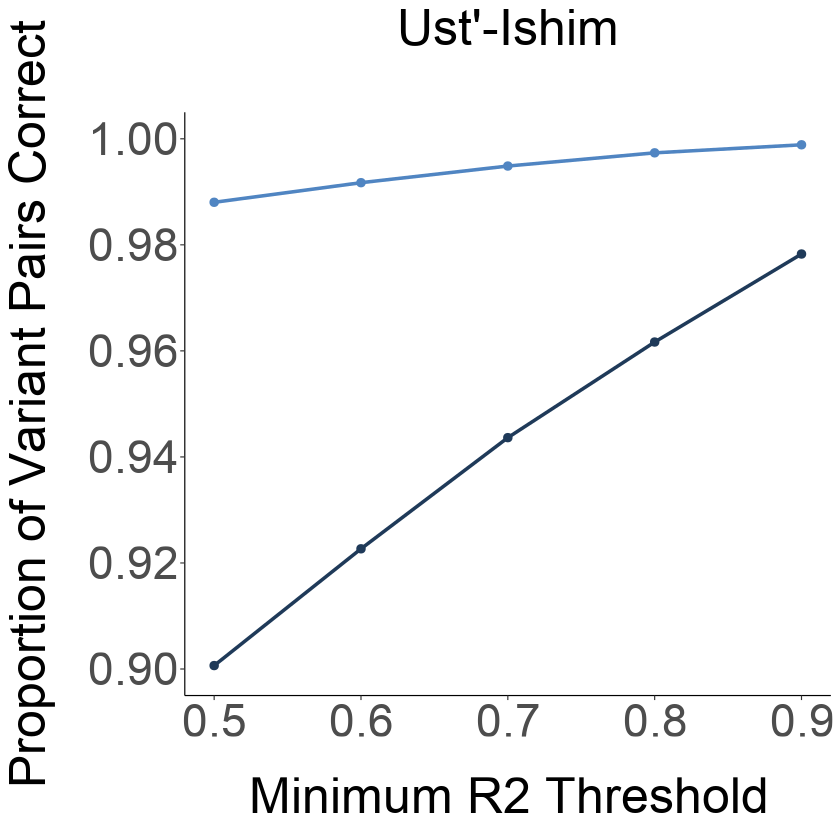

In [27]:
Ust_Ishim_eval_plot <- evaluation_success_plot(Ust_Ishim_eval_stats, 'Ust\'-Ishim')
Ust_Ishim_eval_plot

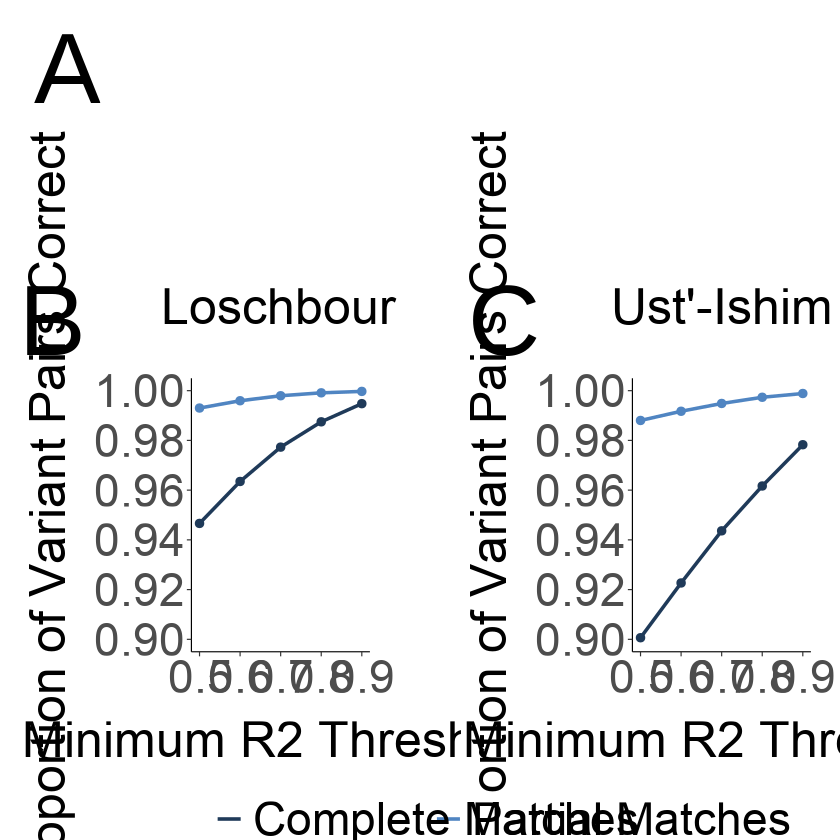

In [28]:
top_row <- plot_grid(NULL,
                     label_fontface = 'plain',
                     label_size = 24,
                     labels = c('A'),
                     nrow = 1
            )

middle_row <- plot_grid(Loschbour_eval_plot,
                        NULL,
                        Ust_Ishim_eval_plot,
                        label_fontface = 'plain',
                        label_size = 24,
                        labels = c('B','','C'),
                        nrow = 1,
                        rel_widths = c(0.475,0.05,0.475),
                        scale = 0.9
                )

bottom_row <- plot_grid(legend,
                        nrow = 1
                       )

evaluation_plot <- plot_grid(top_row,
                  middle_row,
                  bottom_row,
                  ncol = 1,
                  rel_heights = c(0.3,0.65,0.05)
        )

evaluation_plot

In [29]:
pdf('figures/main_fig_components/evaluation.pdf', height = 6, width = 8.5)
evaluation_plot
dev.off()

png 
  2

### Mismatches by Genomic Window <a class = 'anchor' id = 'mismatchesbywindow'></a>

In [30]:
plot_evaluation_mismatch_proportions_by_genomic_window <- function(file_path, title) {
  chr_lengths <- c(
    chr1 = 248956422, chr2 = 242193529, chr3 = 198295559, chr4 = 190214555,
    chr5 = 181538259, chr6 = 170805979, chr7 = 159345973, chr8 = 145138636,
    chr9 = 138394717, chr10 = 133797422, chr11 = 135086622, chr12 = 133275309,
    chr13 = 114364328, chr14 = 107043718, chr15 = 101991189, chr16 = 90338345,
    chr17 = 83257441, chr18 = 80373285, chr19 = 58617616, chr20 = 64444167,
    chr21 = 46709983, chr22 = 50818468, chrX = 156040895
  )

  chrom_order <- names(chr_lengths)
  chr_offsets <- cumsum(c(0, head(chr_lengths, -1)))
  names(chr_offsets) <- chrom_order

  df <- read_tsv(
    file_path,
    col_names = c("chr", "pos", "col3", "numerator", "denominator"),
    show_col_types = FALSE
  ) %>%
    filter(chr %in% chrom_order) %>%
    filter(denominator >= 10) %>%
    mutate(
      chr = factor(chr, levels = chrom_order),
      proportion = ifelse(denominator > 0, numerator / denominator, NA_real_),
      cum_pos = pos + chr_offsets[as.character(chr)]
    ) %>%
    filter(!is.na(proportion))

  axis_df <- data.frame(
    chr = names(chr_lengths),
    center = chr_offsets + chr_lengths / 2
  )

  ggplot(df, aes(
      x = cum_pos,
      y = proportion
  )) +
    geom_point(aes(color = chr), alpha = 0.6, size = 1.2) +
    scale_color_manual(values = rep(c("gray20", "gray60"), length.out = length(chrom_order))) +
    scale_x_continuous(breaks = axis_df$center, labels = gsub("chr", "", axis_df$chr)) +
    scale_y_continuous(limits = c(0, 1), expand = expansion(mult = c(0, 0.02))) +
    ggtitle(title) +
    xlab('Chromosome') +
    ylab('Mismatch Proportion') + 
    fig_theme +
    theme(
      axis.text.x = element_text(size = 11, vjust = 0.5),
      legend.position = 'none',
      plot.title = element_text(family = 'Arial', hjust = 0.5, margin = margin(b = 30, l = 0, r = 0, t = 0), size = 12)
    )
}

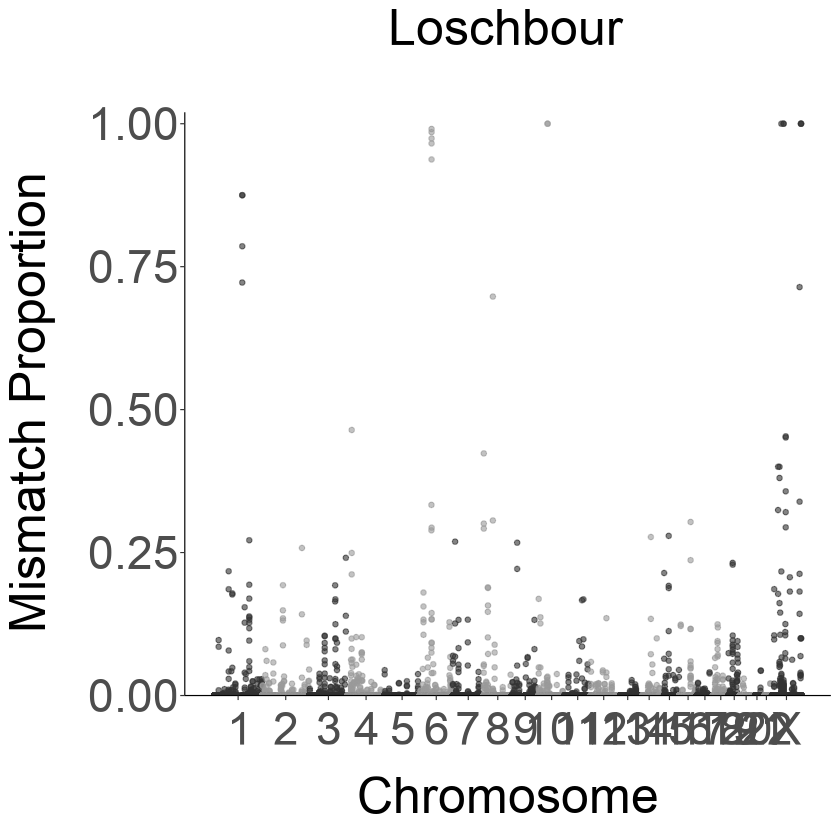

In [31]:
Loschbour_mismatch_proportions_by_genomic_window <- plot_evaluation_mismatch_proportions_by_genomic_window('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/evaluation/mismatches_by_genomic_window/Loschbour_0.9_complete_mismatches_by_genomic_window.txt', 'Loschbour')
Loschbour_mismatch_proportions_by_genomic_window

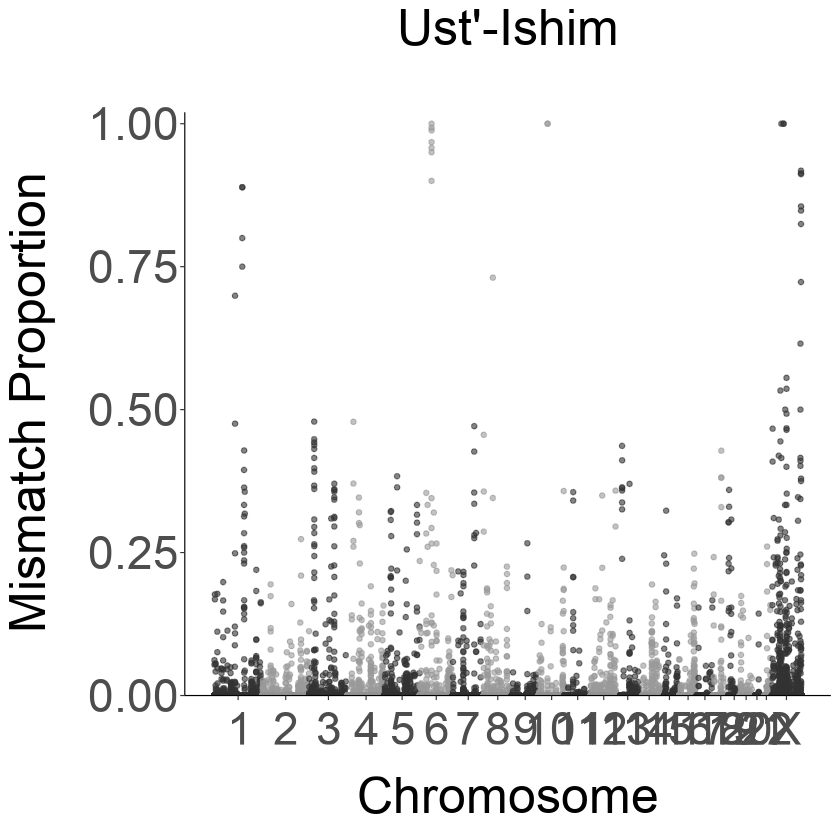

In [32]:
Ust_Ishim_mismatch_proportions_by_genomic_window <- plot_evaluation_mismatch_proportions_by_genomic_window('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/evaluation/mismatches_by_genomic_window/Ust_Ishim_0.9_complete_mismatches_by_genomic_window.txt', 'Ust\'-Ishim')
Ust_Ishim_mismatch_proportions_by_genomic_window

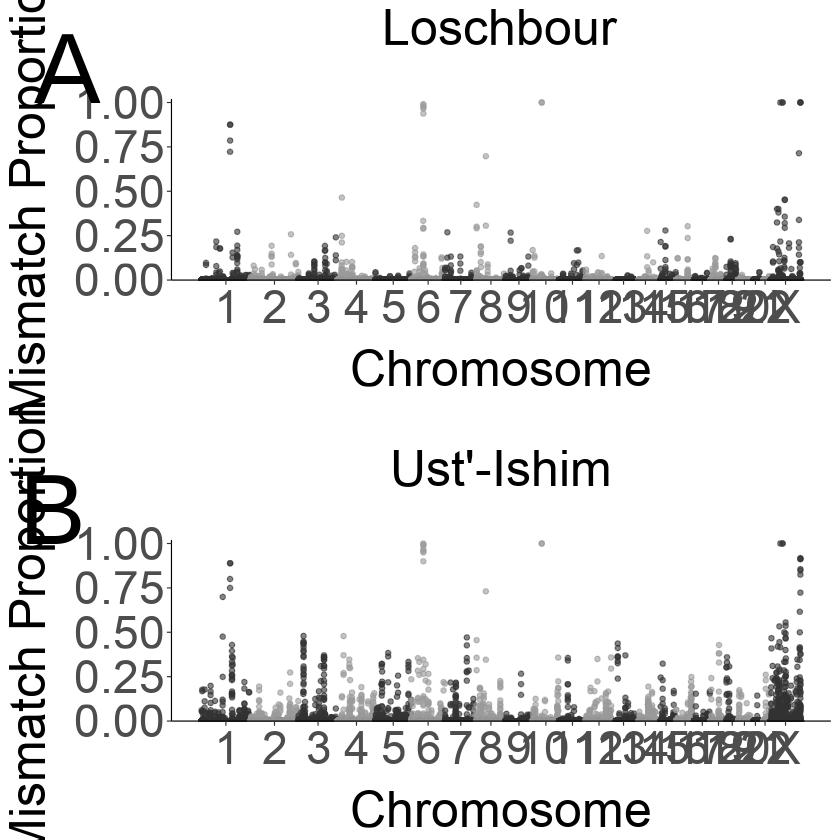

In [33]:
mismatch_proportions_by_genomic_window_plot <- plot_grid(Loschbour_mismatch_proportions_by_genomic_window, NULL, Ust_Ishim_mismatch_proportions_by_genomic_window, labels = c('A','','B'), label_size = 24, label_fontface = 'plain', ncol = 1, rel_heights = c(0.475,0.05,0.475))
mismatch_proportions_by_genomic_window_plot

In [34]:
pdf('figures/suppl_figs/mismatch_proportions_by_genomic_window.pdf', height = 6, width = 10)
mismatch_proportions_by_genomic_window_plot
dev.off()

png 
  2

## AGV and LD Variants GWAS Intersection <a class = 'anchor' id = 'gwasintersect'></a>

In [35]:
AGV_LD_variant_GWAS_intersect <- read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/GWAS/AGV_LD_variants_GWAS_intersection_summary_updated.txt', sep = '\t', header = TRUE)

AGV_LD_variant_GWAS_intersect_melted <- AGV_LD_variant_GWAS_intersect %>%
  mutate(
    AGVs = proportion_AGV_GWAS_significant_variants,
    LDVs = proportion_AGV_and_LD_variant_GWAS_significant_variants - proportion_AGV_GWAS_significant_variants
  ) %>%
  select(Trait, N_GWAS_significant_variants, AGVs, LDVs) %>%
  pivot_longer(cols = c(AGVs, LDVs),
               names_to = 'Set',
               values_to = 'Proportion')

AGV_LD_variant_GWAS_intersect_melted

Trait                   N_GWAS_significant_variants Set  Proportion
1  coronary_artery_disease  17871                      AGVs 0.14190588
2  coronary_artery_disease  17871                      LDVs 0.69928935
3  psoriasis                46121                      AGVs 0.12972399
4  psoriasis                46121                      LDVs 0.50194055
5  ulcerative_colitis        7392                      AGVs 0.16910173
6  ulcerative_colitis        7392                      LDVs 0.65313853
7  body_mass_index          65489                      AGVs 0.19345234
8  body_mass_index          65489                      LDVs 0.68750477
9  N_children_ever_born      5704                      AGVs 0.04803647
10 N_children_ever_born      5704                      LDVs 0.75140252
11 type_2_diabetes          64918                      AGVs 0.15525740
12 type_2_diabetes          64918                      LDVs 0.68190641
13 schizophrenia            20447                      AGVs 0.15415464
14 schizophrenia            20447                      LDVs 0.74299408
15 platelet_count          145686                      AGVs 0.11487720
16 platelet_count          145686                      LDVs 0.56651291
17 Alzheimers                3559                      AGVs 0.11913459
18 Alzheimers                3559                      LDVs 0.55352627
19 height                  115855                      AGVs 0.49681067
20 height                  115855                      LDVs 0.40526520

In [36]:
y_axis_order <- AGV_LD_variant_GWAS_intersect_melted %>% filter(Set == 'AGVs') %>% arrange(Proportion) %>% pull(Trait)
AGV_LD_variant_GWAS_intersect_melted$Trait <- factor(AGV_LD_variant_GWAS_intersect_melted$Trait,levels = y_axis_order)
AGV_LD_variant_GWAS_intersect_melted$Set <- factor(AGV_LD_variant_GWAS_intersect_melted$Set,levels = c('LDVs','AGVs'))

In [37]:
GWAS_labels <- c(
  'height' = 'Height',
  'body_mass_index' = 'BMI',
  'ulcerative_colitis' = 'UC',
  'schizophrenia' = 'Schizophrenia',
  'coronary_artery_disease' = 'CAD',
  'psoriasis' = 'Psoriasis',
  'Alzheimers' = 'LOA',
  'platelet_count' = 'Platelet Count',
  'N_children_ever_born' = 'NEB',
  'type_2_diabetes' = 'T2D'
)

In [38]:
df <- AGV_LD_variant_GWAS_intersect_melted

df$Trait <- as.character(df$Trait)

trait_N_lookup <- df %>%
  distinct(Trait, N_GWAS_significant_variants) %>%
  mutate(
    pretty_label = GWAS_labels[Trait],
    N_formatted = prettyNum(N_GWAS_significant_variants, big.mark = ",", scientific = FALSE),
    label_with_N = paste0(pretty_label, "\n(N = ", N_formatted, ")")
  )

trait_order <- df %>%
  filter(Set == "AGVs") %>%
  group_by(Trait) %>%
  summarise(mean_prop = mean(Proportion, na.rm = TRUE)) %>%
  arrange(mean_prop) %>%
  pull(Trait)

trait_N_lookup <- trait_N_lookup %>%
  mutate(Trait = factor(Trait, levels = trait_order)) %>%
  arrange(Trait)

trait_levels_ordered <- trait_N_lookup$label_with_N

df <- df %>%
  select(-matches("^label_with_N")) %>% 
  left_join(trait_N_lookup %>% select(Trait, label_with_N), by = "Trait")

df$GWAS_label <- factor(df$label_with_N, levels = trait_levels_ordered)

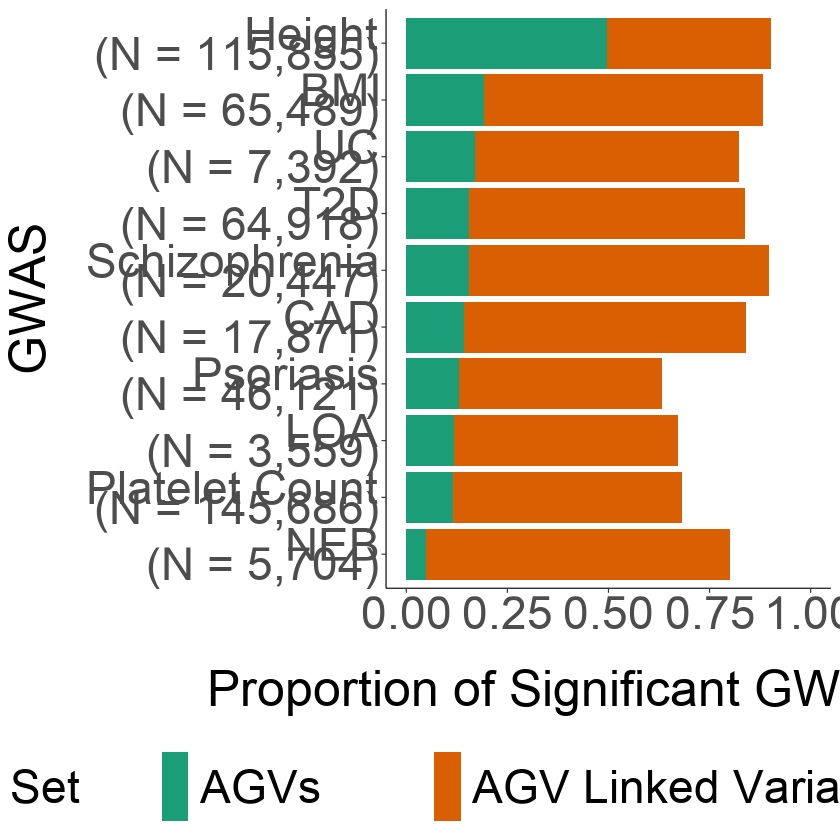

In [39]:
AGV_LD_variant_GWAS_intersect_plot <- ggplot(df, aes(
    x = Proportion,
    y = GWAS_label,
    fill = Set
)) +
    geom_bar(stat = 'identity', width = 0.9) +
    scale_fill_manual(labels = c('AGVs' = 'AGVs', 'LDVs' = 'AGV Linked Variants'),
                      values = c('AGVs' = '#1b9e77', 'LDVs' = '#d95f02')
                     ) +
    scale_x_continuous(limits = c(0, 1)) +
    xlab('Proportion of Significant GWAS Loci') + 
    ylab('GWAS') +
    fig_theme +
    theme(legend.position = 'bottom',
          legend.spacing.x = unit(0.2, 'cm'),
          legend.text = element_text(family = 'Arial', margin = margin(r = 15, unit = 'pt'), size = 11),
          legend.title = element_text(family = "Arial", margin = margin(r = 15, unit = 'pt'), size = 11)
    )

AGV_LD_variant_GWAS_intersect_plot

In [40]:
pdf('figures/main_figs/fig_3.pdf', height = 8, width = 10)
AGV_LD_variant_GWAS_intersect_plot
dev.off()

png 
  2

## AGV Sample Coverage <a class = 'anchor' id = 'evaluation'></a>

In [41]:
AGV_sample_coverage = read.csv(gzfile('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/AGVs/ancient_sample_coverage_per_site/ancient_sample_coverage_per_site.txt'), sep = '\t', header = TRUE)
head(AGV_sample_coverage)

chr  pos    non_missing_samples
1 chr1 752566 4535               
2 chr1 776546 4985               
3 chr1 832918 2650               
4 chr1 842013 4520               
5 chr1 846864 4899               
6 chr1 869303 3392

In [42]:
inverse_CDF_AGV_sample_coverage <- AGV_sample_coverage %>%
arrange(non_missing_samples) %>%
mutate(n_sites = rev(seq_len(n())),
       proportion = n_sites / n())

In [43]:
head(inverse_CDF_AGV_sample_coverage)

chr  pos       non_missing_samples n_sites proportion
1 chr1 149810915 0                   1200343 1.0000000 
2 chr1 248612910 0                   1200342 0.9999992 
3 chr2 112037028 0                   1200341 0.9999983 
4 chr2 131315032 0                   1200340 0.9999975 
5 chr5  70225669 0                   1200339 0.9999967 
6 chr5  70324611 0                   1200338 0.9999958

In [44]:
tail(inverse_CDF_AGV_sample_coverage)

chr   pos       non_missing_samples n_sites proportion     
1200338 chr4      51441 7693                6       0.0000049985712
1200339 chr2   91821412 7822                5       0.0000041654760
1200340 chr1  145066917 7880                4       0.0000033323808
1200341 chr2   91820554 7885                3       0.0000024992856
1200342 chr17  41466257 7925                2       0.0000016661904
1200343 chr2   91819253 8124                1       0.0000008330952

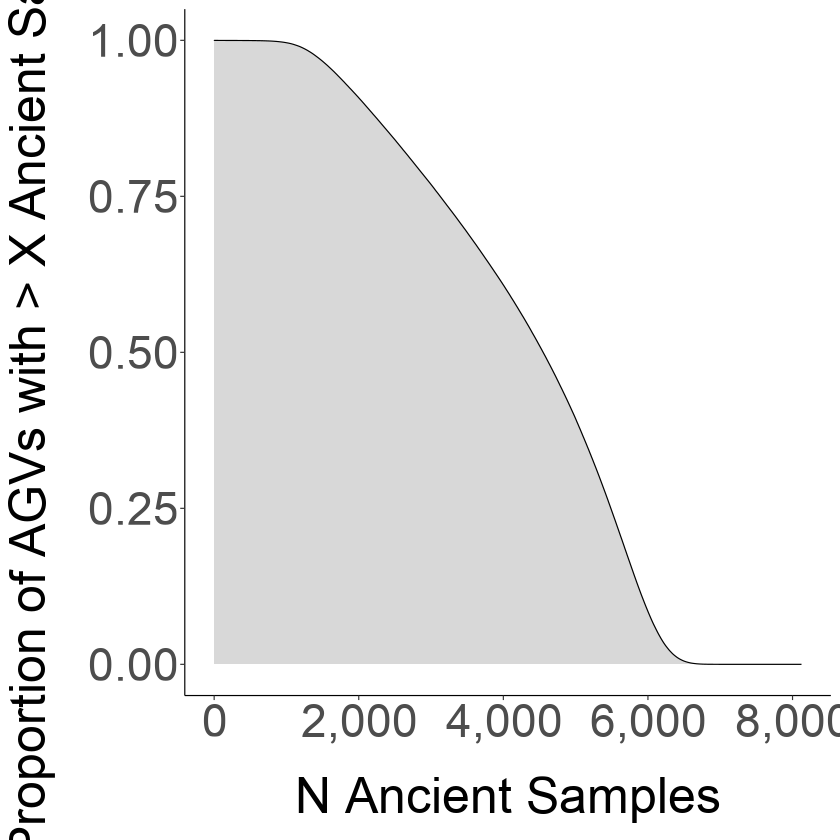

In [45]:
inverse_CDF_AGV_sample_coverage_plot <- ggplot(inverse_CDF_AGV_sample_coverage, aes(x = non_missing_samples,
                                            y = proportion
                                           )) +
    geom_ribbon(aes(ymin = 0, ymax = proportion), fill = 'grey', alpha = 0.6) +
    geom_step(direction = 'hv', size = (0.125 / 0.377)) +
    scale_x_continuous(labels = scales::comma_format(scale = 1)) +
    xlab('N Ancient Samples') +
    ylab('Proportion of AGVs with > X Ancient Samples') +
    fig_theme

inverse_CDF_AGV_sample_coverage_plot

In [46]:
pdf('figures/suppl_figs/inverse_CDF_AGV_sample_coverage.pdf', height = 5, width = 8)
inverse_CDF_AGV_sample_coverage_plot
dev.off()

png 
  2

In [47]:
png('figures/suppl_figs/inverse_CDF_AGV_sample_coverage.png', height = 5, width = 8, units = 'in', res = 300)
inverse_CDF_AGV_sample_coverage_plot
dev.off()

png 
  2

## AGVs in TopLD <a class = 'anchor' id = 'agvsintopld'></a>

In [48]:
AGVs = read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/AGVs/AGVs_hg38_annotated.txt.gz', sep = '\t', header = TRUE)
AGVs <- AGVs %>% mutate(across(everything(), ~ na_if(., "")))
AGVs$AF <- ifelse(!is.na(AGVs$AF), as.numeric(AGVs$AF), NA)
AGVs$AFR_AF <- ifelse(!is.na(AGVs$AFR_AF), as.numeric(AGVs$AFR_AF), NA)
AGVs$EAS_AF <- ifelse(!is.na(AGVs$EAS_AF), as.numeric(AGVs$EAS_AF), NA)
AGVs$EUR_AF <- ifelse(!is.na(AGVs$EUR_AF), as.numeric(AGVs$EUR_AF), NA)
AGVs$SAS_AF <- ifelse(!is.na(AGVs$SAS_AF), as.numeric(AGVs$SAS_AF), NA)
head(AGVs)

Warning message in ifelse(!is.na(AGVs$AF), as.numeric(AGVs$AF), NA):
“NAs introduced by coercion”
Warning message in ifelse(!is.na(AGVs$AFR_AF), as.numeric(AGVs$AFR_AF), NA):
“NAs introduced by coercion”
Warning message in ifelse(!is.na(AGVs$EAS_AF), as.numeric(AGVs$EAS_AF), NA):
“NAs introduced by coercion”
Warning message in ifelse(!is.na(AGVs$EUR_AF), as.numeric(AGVs$EUR_AF), NA):
“NAs introduced by coercion”
Warning message in ifelse(!is.na(AGVs$SAS_AF), as.numeric(AGVs$SAS_AF), NA):
“NAs introduced by coercion”


chr  pos    ref alt rsID        filter AF        AFR_AF    EAS_AF    
1 chr1 817186 G   A   rs3094315   PASS   0.7117540 0.4359100 0.88809700
2 chr1 841166 A   G   rs12124819  PASS   0.1721730 0.0458921 0.00134771
3 chr1 897538 T   C   rs28765502  PASS   0.3672790 0.5484910 0.16017000
4 chr1 906633 T   G   rs7419119   PASS   0.1911100 0.1390170 0.13274500
5 chr1 911484 G   C   rs950122    PASS   0.2179830 0.2712600 0.10347500
6 chr1 933923 C   T   rs113171913 PASS   0.0743305 0.0220791 0.01341250
  EUR_AF    SAS_AF    TopLD_presence  MAFs                    LDV_presence   
1 0.8257750 0.7912860 NA              NA                      NA             
2 0.2727950 0.0828844 AFR,EAS,EUR,SAS 0.013,0.001,0.25,0.071  AFR,EAS,EUR,SAS
3 0.2925760 0.2326840 AFR,EAS,EUR,SAS 0.398,0.145,0.292,0.222 AFR,EAS,EUR,SAS
4 0.2089380 0.2140760 AFR,EAS,EUR,SAS 0.126,0.13,0.217,0.197  AFR,EAS,EUR,SAS
5 0.1929260 0.2486520 AFR,EAS,EUR,SAS 0.274,0.107,0.195,0.274 AFR,EAS,EUR,SAS
6 0.0987195 0.1488370 AFR,EAS,EUR,SAS 0.043,0.069,0.26,0.335  AFR,EAS,EUR,SAS

### AGVs TopLD Presence by Ancestry Group <a class = 'anchor' id = 'agvstopldpresencebyancestrygroup'></a>

In [49]:
AGVs_TopLD_presence_for_upset <- AGVs %>%
  mutate(
    AFR = ifelse(grepl('AFR', TopLD_presence), 1, 0),
    EAS = ifelse(grepl('EAS', TopLD_presence), 1, 0),
    EUR = ifelse(grepl('EUR', TopLD_presence), 1, 0),
    SAS = ifelse(grepl('SAS', TopLD_presence), 1, 0)
  ) %>%
  select(AFR, EAS, EUR, SAS)

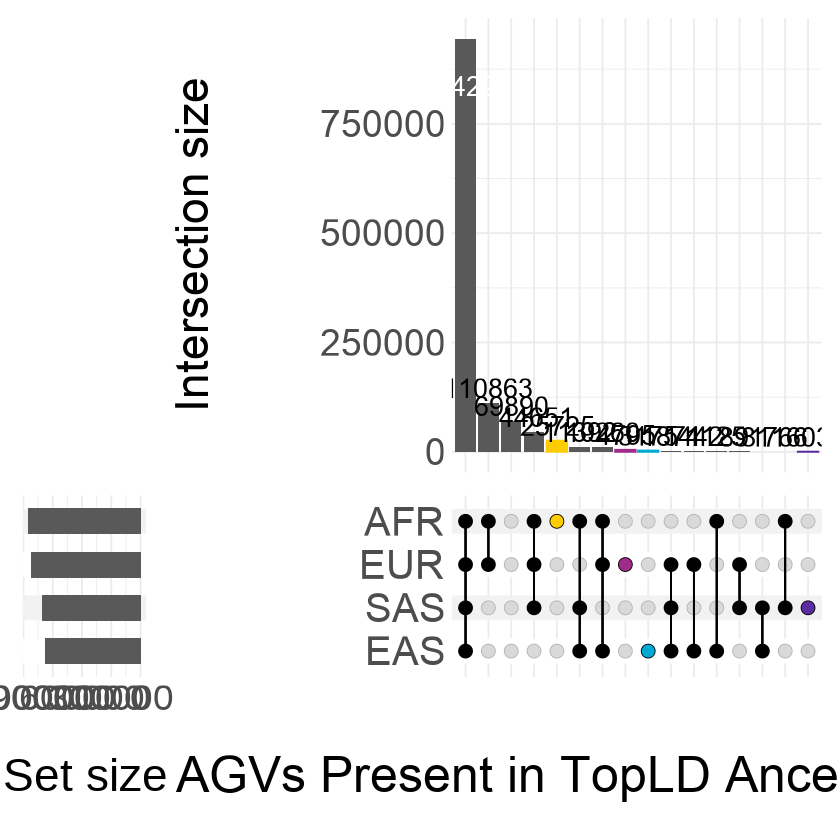

In [50]:
AGVs_TopLD_presence_upset_plot <- upset(AGVs_TopLD_presence_for_upset, intersect = c('AFR','EAS','EUR','SAS'), sort_sets = 'descending',
                      name = 'AGVs Present in TopLD Ancestry Groups', 
                      min_size = 0,
                      height_ratio = 0.4,
                      width_ratio = 0.25,
                      matrix = (intersection_matrix(geom = geom_point(size = 3))),
                      base_annotations = list('Intersection size' = intersection_size(text = list(family = 'Arial', size = 2.3))), # The size argument does not appear to respond to the ggplot .pt constant hence the different size here.
                      themes = upset_modify_themes(list('Intersection size' = theme(text = element_text(family = 'Arial', size = 11)),  
                                                       'intersections_matrix' = theme(text = element_text(family = 'Arial', size = 12)))),
                      queries = list(upset_query(intersect = c('AFR'), color = AFR_color, fill = AFR_color),
                                     upset_query(intersect = c('EAS'), color = EAS_color, fill = EAS_color),
                                     upset_query(intersect = c('EUR'), color = EUR_color, fill = EUR_color),
                                     upset_query(intersect = c('SAS'), color = SAS_color, fill = SAS_color)))

AGVs_TopLD_presence_upset_plot

In [51]:
pdf('figures/suppl_figs/AGVs_TopLD_ancestry_group_presence.pdf', height = 5, width = 10)
AGVs_TopLD_presence_upset_plot
dev.off()

png 
  2

### AGV Alleles Frequencies <a class = 'anchor' id = 'agvallelefrequencies'></a>

In [52]:
AGVs_allele_frequency_distribution_plot <- function(column, x_label, color) {
    N_non_NAs <- sum(!is.na(AGVs[[column]]))
    formatted_N_non_NAs <- format(N_non_NAs, big.mark = ',', scientific = FALSE)
    
    ggplot(AGVs, aes(
        x = .data[[column]]
    )) + 
        geom_density(alpha = 0.6, fill = color, size = (0.125/0.377)) + 
        xlab(x_label) +
        ylab('Density') +
        coord_cartesian(ylim = c(0,6)) +
        fig_theme + 
        annotate('text', color = 'black', family = 'Arial', label = paste('N =', formatted_N_non_NAs), size = 11/.pt, x = 0.70, y = 6)
}

Warning message:
“Removed 48455 rows containing non-finite values (stat_density).”


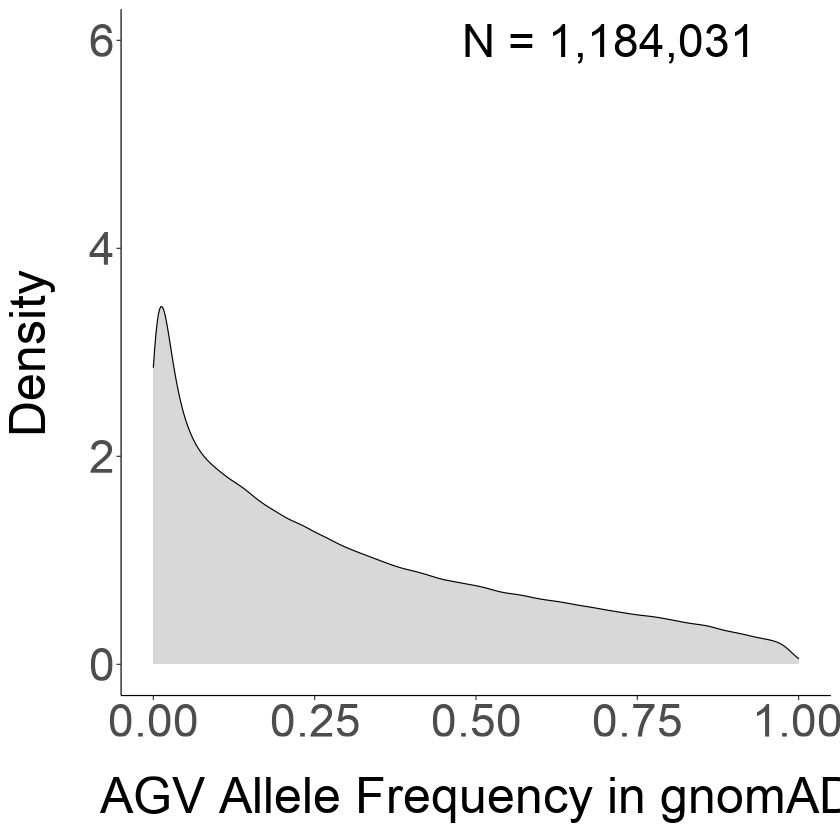

In [53]:
global_AGVs_AF_plot <- AGVs_allele_frequency_distribution_plot('AF', 'AGV Allele Frequency in gnomAD', 'grey')
global_AGVs_AF_plot

Warning message:
“Removed 48458 rows containing non-finite values (stat_density).”


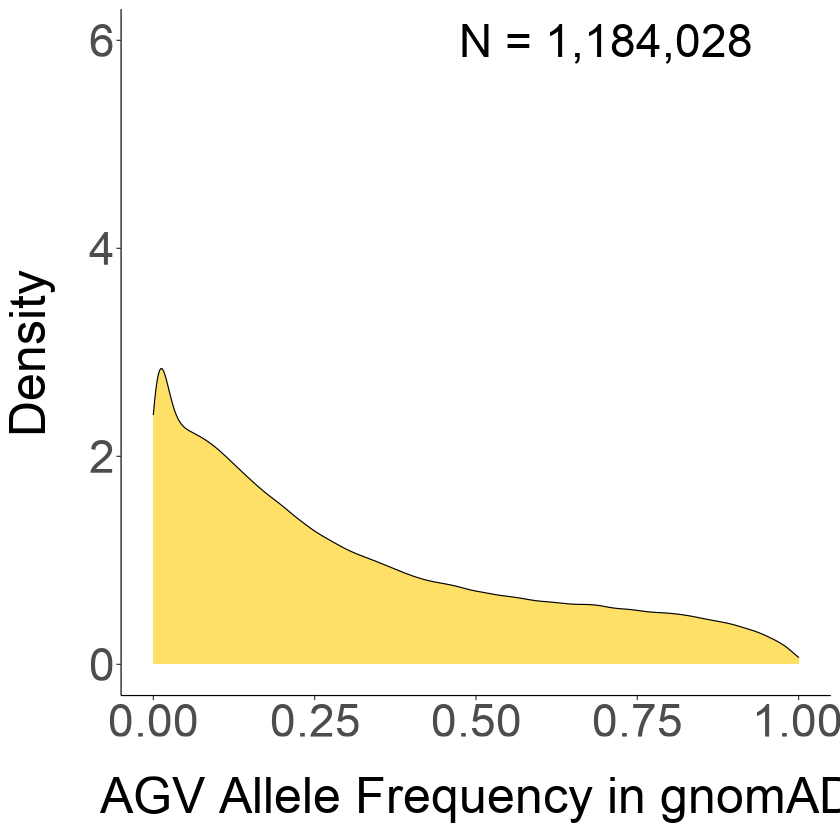

In [54]:
AFR_AGVs_AF_plot <- AGVs_allele_frequency_distribution_plot('AFR_AF', 'AGV Allele Frequency in gnomAD', AFR_color)
AFR_AGVs_AF_plot

Warning message:
“Removed 48464 rows containing non-finite values (stat_density).”


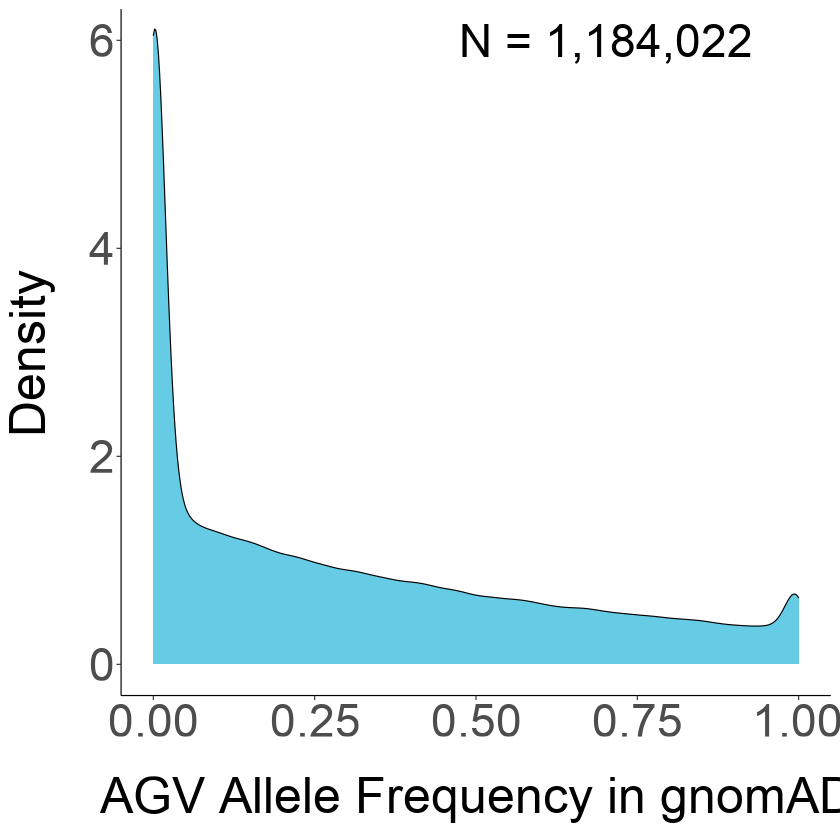

In [55]:
EAS_AGVs_AF_plot <- AGVs_allele_frequency_distribution_plot('EAS_AF', 'AGV Allele Frequency in gnomAD', EAS_color)
EAS_AGVs_AF_plot

Warning message:
“Removed 48458 rows containing non-finite values (stat_density).”


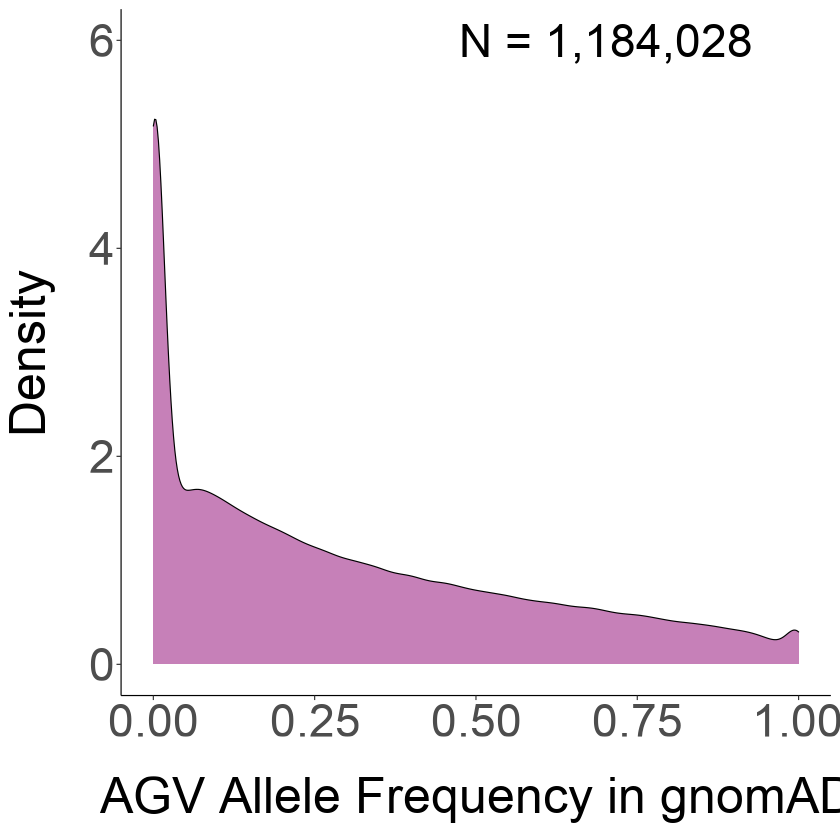

In [56]:
EUR_AGVs_AF_plot <- AGVs_allele_frequency_distribution_plot('EUR_AF', 'AGV Allele Frequency in gnomAD', EUR_color)
EUR_AGVs_AF_plot

Warning message:
“Removed 48462 rows containing non-finite values (stat_density).”


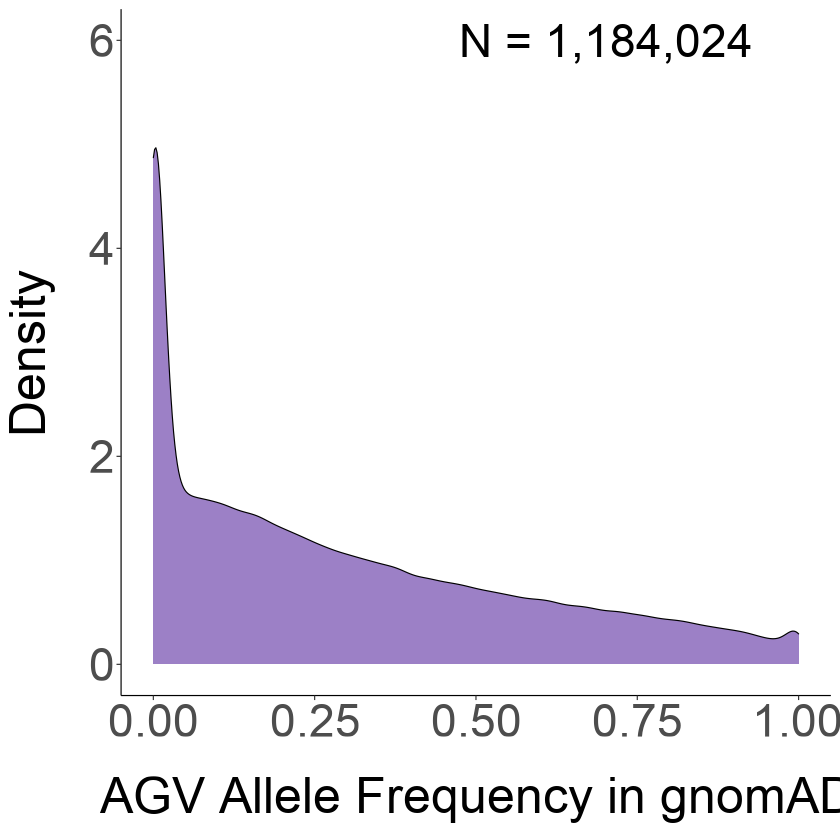

In [57]:
SAS_AGVs_AF_plot <- AGVs_allele_frequency_distribution_plot('SAS_AF', 'AGV Allele Frequency in gnomAD', SAS_color)
SAS_AGVs_AF_plot

In [58]:
right_left <- plot_grid(AFR_AGVs_AF_plot,
                        NULL,
                        EAS_AGVs_AF_plot,
                        label_fontface = 'plain',
                        label_size = 24,
                        labels = c('B','','D'),
                        ncol = 1,
                        rel_heights = c(0.48,0.04,0.48),
                        scale = 0.95
                )

right_right <- plot_grid(EUR_AGVs_AF_plot,
                         NULL,
                         SAS_AGVs_AF_plot,
                         label_fontface = 'plain',
                         label_size = 24,
                         labels = c('C','','E'),
                         ncol = 1,
                         rel_heights = c(0.48,0.04,0.48),
                         scale = 0.95
                )

Warning message:
“Removed 48458 rows containing non-finite values (stat_density).”
Warning message:
“Removed 48464 rows containing non-finite values (stat_density).”
Warning message:
“Removed 48458 rows containing non-finite values (stat_density).”
Warning message:
“Removed 48462 rows containing non-finite values (stat_density).”


Warning message:
“Removed 48455 rows containing non-finite values (stat_density).”


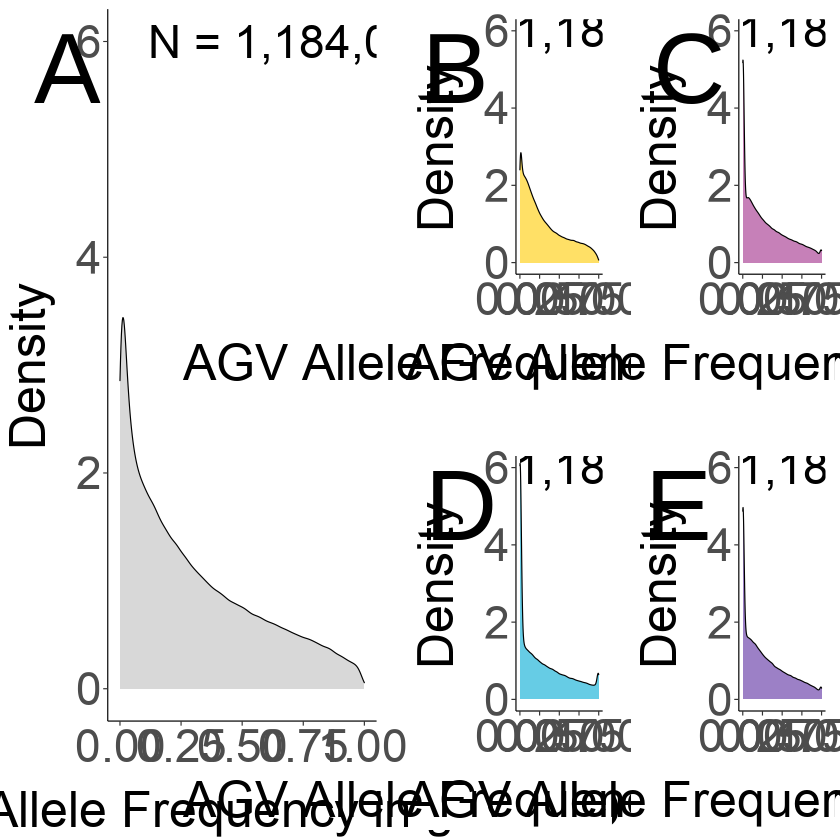

In [59]:
plot <- plot_grid(global_AGVs_AF_plot,
                  NULL,
                  right_left,
                  NULL,
                  right_right,
                  label_fontface = 'plain',
                  label_size = 24,
                  labels = c('A','','','',''),
                  nrow = 1,
                  rel_widths = c(0.45,0.02,0.25,0.01,0.25)
        )

plot

In [60]:
pdf('figures/suppl_figs/AGV_AF_distributions.pdf', height = 5, width = 10)
plot
dev.off()

png 
  2

### AGV Allele Frequencies by TopLD Presence/Absence <a class = 'anchor' id = 'agvallelefrequenciesbytopldpresenceabsence'></a>

In [61]:
AGVs_subset <- AGVs[is.na(AGVs$TopLD_presence), ]
nrow(AGVs_subset)

[1] 69890

In [62]:
TopLD_absent_AGVs <- subset(AGVs, is.na(TopLD_presence) & !is.na(AF), select = AF)
head(TopLD_absent_AGVs)

AF          
1   0.7117540000
8   0.8763540000
49  0.0000334063
78  0.0000459716
113 0.0001903890
147 0.0000459535

In [63]:
TopLD_absent_AGVs <- subset(AGVs, is.na(TopLD_presence) & !is.na(AF), select = AF)
TopLD_absent_AGVs$TopLD <- 'Absent'
TopLD_present_AGVs <- subset(AGVs, !is.na(TopLD_presence) & !is.na(AF), select = AF)
TopLD_present_AGVs$TopLD <- 'Present'
TopLD_AGV_AFs_by_presence_absence <- rbind(TopLD_absent_AGVs, TopLD_present_AGVs)
head(TopLD_AGV_AFs_by_presence_absence)

AF           TopLD 
1   0.7117540000 Absent
8   0.8763540000 Absent
49  0.0000334063 Absent
78  0.0000459716 Absent
113 0.0001903890 Absent
147 0.0000459535 Absent

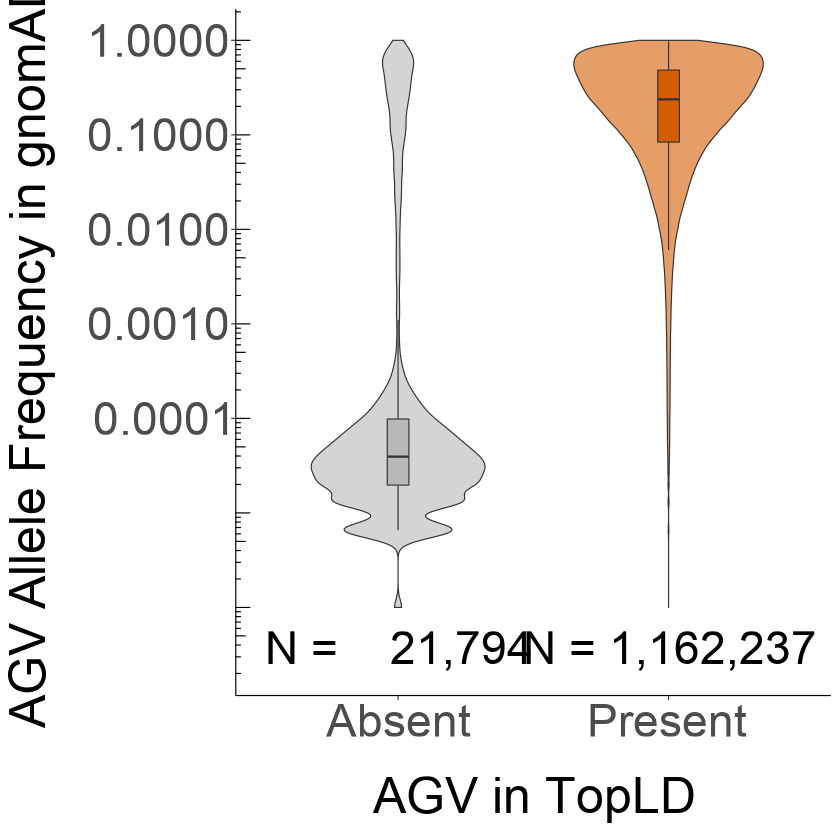

In [64]:
Ns <- TopLD_AGV_AFs_by_presence_absence %>% group_by(TopLD) %>% summarise(Ns = sum(!is.na(AF)))
Ns$Ns <- format(Ns$Ns, big.mark = ",", scientific = FALSE)

TopLD_AGV_AFs_by_presence_absence$AF[TopLD_AGV_AFs_by_presence_absence$AF == 0] <- 1e-6 # transform 0s to small number to not generates non-finite values with log transform

AGV_AFs_by_TopLD_presence <- ggplot(TopLD_AGV_AFs_by_presence_absence, aes(
    x = TopLD,
    y = AF,
    fill = TopLD
)) +
    geom_violin(alpha = 0.6, adjust = 1.3, size = (0.125/0.377), width = 0.7) +
    geom_boxplot(lwd = (0.125/0.377), outlier.shape = NA, width = 0.08) +
    scale_fill_manual(values = c('#b8b8b8','#d55e00')) +
    scale_y_continuous(
        breaks = c(0.0001, 0.001, 0.01, 0.1, 1),
        labels = scales::comma_format(scale = 1),
        limits = c(NA,1),
        trans = 'log10'
    ) +
    xlab('AGV in TopLD') +
    ylab('AGV Allele Frequency in gnomAD') + 
    annotation_logticks(sides = 'l', size = (0.125/0.377)) +
    geom_text(data = Ns, aes(x = TopLD, y = 0.00000025, family = 'Arial', hjust = 0.5, label = paste("N =", Ns)), size = 11/.pt, vjust = 0) +
    fig_theme

AGV_AFs_by_TopLD_presence 

In [65]:
pdf('figures/suppl_figs/AGV_AFs_by_TopLD_presence.pdf', height = 6, width = 6)
AGV_AFs_by_TopLD_presence
dev.off()

png 
  2

## AGV Age Estimates <a class = 'anchor' id = 'agvageestimates'></a>

In [66]:
high_quality_AGV_age_estimates_single_estimate_per_variant = read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/AGV_age_estimates/high_quality_AGV_age_estimates_single_estimate_per_variant_non_missing_AF.txt', sep = '\t', header = TRUE)
head(high_quality_AGV_age_estimates_single_estimate_per_variant)

VariantID   Chromosome Position  AlleleRef AlleleAlt AlleleAnc DataSource
1 X1006057566 4          106057566 C         A         .         SGDP      
2 X1011551444 4          111551444 C         A         .         SGDP      
3 X1030537730 4          130537730 C         A         .         SGDP      
4 X1048393664 4          148393664 C         T         .         SGDP      
5 X1048996340 4          148996340 G         A         .         SGDP      
6 X10749626   1           10749626 C         A         .         SGDP      
  NumConcordant NumDiscordant AgeMode_Mut ⋯ AgeCI95Upper_Rec QualScore_Rec
1   3            93            7221.45    ⋯   974.11         0.333        
2 100            99            9092.68    ⋯ 20934.30         0.737        
3  99            99            3999.58    ⋯ 16721.70         0.677        
4 100            99            3983.99    ⋯ 16909.50         0.768        
5   6           100            7415.13    ⋯  8115.82         1.000        
6  99            99           21682.40    ⋯ 23465.80         0.697        
  AgeMode_Jnt AgeMean_Jnt AgeMedian_Jnt AgeCI95Lower_Jnt AgeCI95Upper_Jnt
1  2709.02     2679.14     2653.14       1832.75          3589.24        
2 20949.40    20633.20    20471.30      13871.80         27911.30        
3  2292.36     2287.57     2284.75       2067.80          2507.72        
4  2773.28     2768.35     2766.83       2494.55          3040.39        
5  6457.06     6879.66     6612.44       4275.96         10809.00        
6 25930.60    25909.40    25807.30      21175.30         31006.00        
  QualScore_Jnt gnomAD_AF    DataSources
1 0.667         0.0000318573 SGDP       
2 0.737         0.3062400000 SGDP       
3 0.909         0.1263340000 SGDP       
4 0.940         0.1488540000 SGDP       
5 1.000         0.0000318492 SGDP       
6 0.697         0.0663581000 SGDP

In [67]:
plot_allele_age_distribution <- function(dataframe, age_column, color, title) {
    ggplot(dataframe, aes(
        x = (.data[[age_column]]*29)+1
    )) + 
    geom_density(alpha = 0.6, fill = color, size = (0.125/0.377)) +
    geom_vline(xintercept = c(60000+1), linetype = 'dashed', size = (0.125/0.377)) +
    scale_x_continuous(
        breaks = trans_breaks('log10', function(x) 10^x),
        labels = scales::comma_format(scale = 1),
        limits = c(1,3700000),
        trans = 'log10',
    ) +
    ggtitle(title) +
    xlab('AGV Age Estimate (yrs)') +
    ylab('Density') +
    annotation_logticks(sides = 'b', size = (0.125/0.377)) +
    fig_theme +
    theme(plot.title = element_text(family = 'Arial', hjust = 0.5, margin = margin(b = 30, l = 0, r = 0, t = 0), size = 12))
}

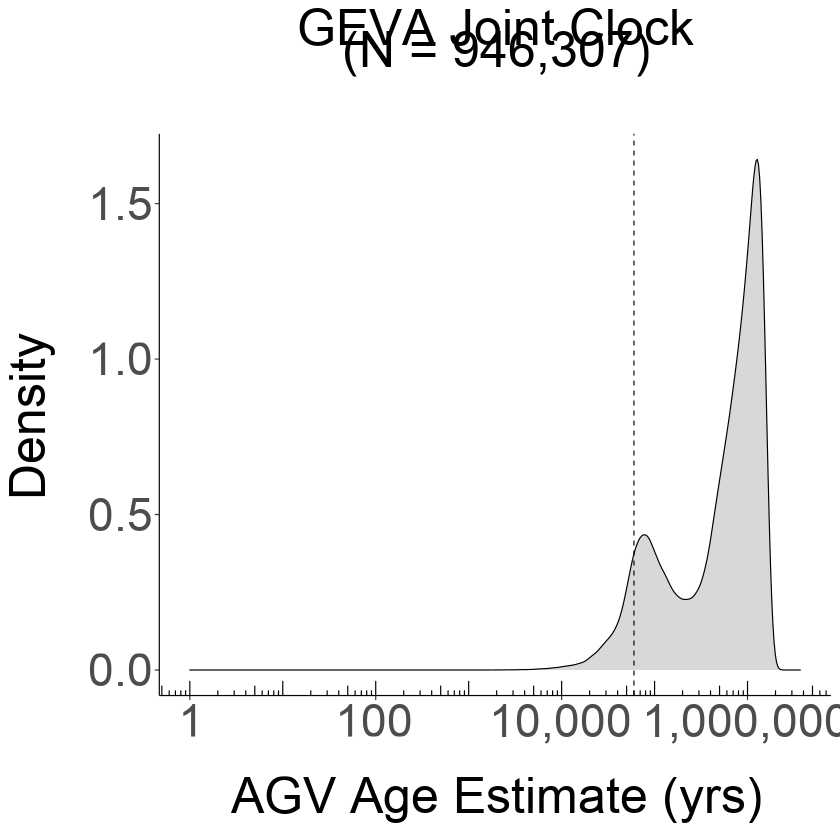

In [68]:
HGD_AGV_ages_plot <- plot_allele_age_distribution(high_quality_AGV_age_estimates_single_estimate_per_variant, 'AgeMode_Jnt', 'grey', 'GEVA Joint Clock\n(N = 946,307)')
HGD_AGV_ages_plot

In [69]:
AGV_tree_sequence_ages = read.csv(gzfile('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/AGV_age_estimates/AGV_tree_sequence_age_estimates.txt.gz'), sep = '\t', header = FALSE)
colnames(AGV_tree_sequence_ages) <- c('chr','pos','age')
AGV_tree_sequence_ages <- AGV_tree_sequence_ages %>% filter(is.finite(age))
head(AGV_tree_sequence_ages)

chr  pos     age    
1 chr1  955641 7700.00
2 chr1  960891 1750.00
3 chr1 1083324 1580.00
4 chr1 1086035 1580.00
5 chr1 1086278 4400.04
6 chr1 1086315 1580.00

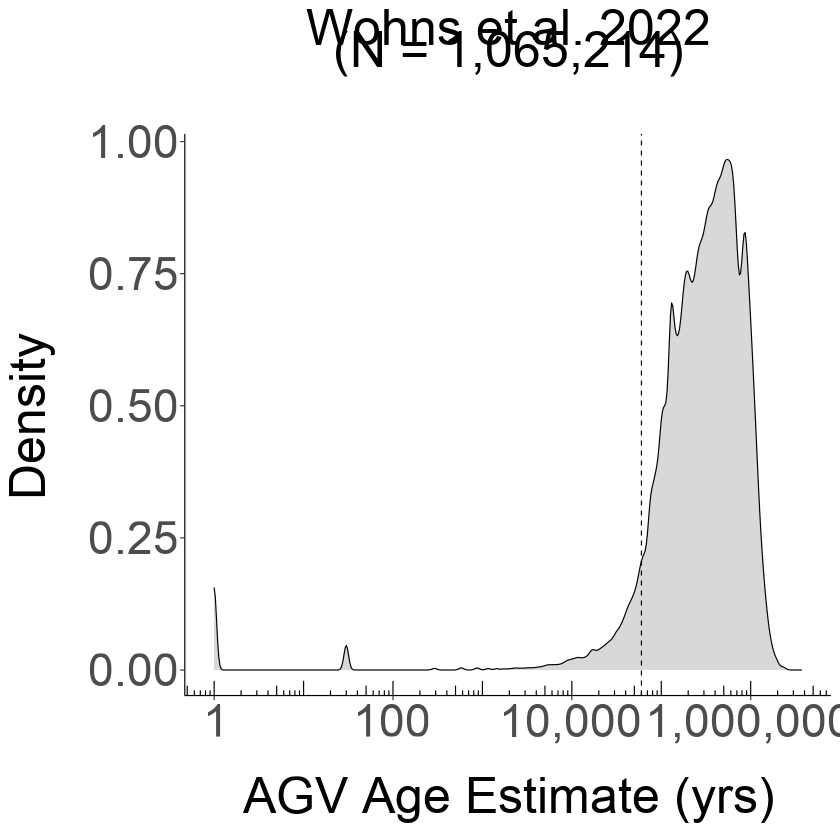

In [70]:
tree_sequence_AGV_ages_plot <- plot_allele_age_distribution(AGV_tree_sequence_ages, 'age', 'grey', 'Wohns et al. 2022\n(N = 1,065,214)')
tree_sequence_AGV_ages_plot

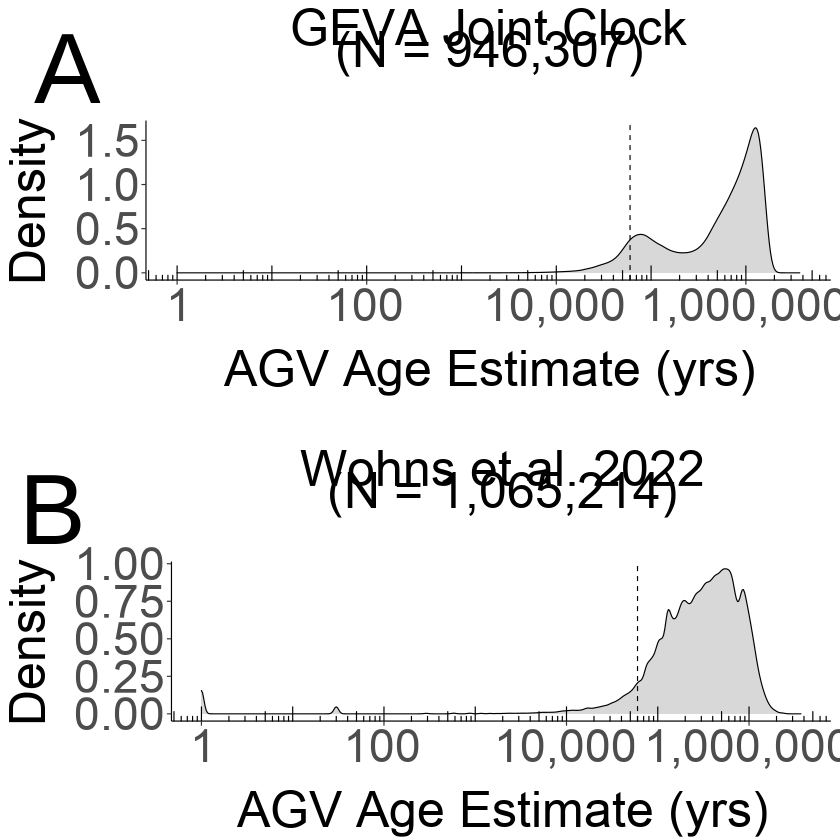

In [71]:
AGV_ages_plot <- plot_grid(HGD_AGV_ages_plot, NULL, tree_sequence_AGV_ages_plot, labels = c('A','','B'), label_size = 24, label_fontface = 'plain', ncol = 1, rel_heights = c(0.475,0.05,0.475))
AGV_ages_plot

In [72]:
pdf('figures/suppl_figs/AGV_ages.pdf', height = 6, width = 10)
AGV_ages_plot
dev.off()

png 
  2

## Allele Frequency Trajectory Examples <a class = 'anchor' id = 'allelefrequencytrajectoryexamples'></a>

In [73]:
process_filtered_genotypes <- function(file) {
    genotypes <- read.csv(paste0('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/allele_frequency_trajectories/', file),
                          header = TRUE, sep = '\t', na.strings = c("", "NA"))
    
    genotypes$Region <- as.factor(genotypes$Region)
    
    genotypes <- na.omit(genotypes)

    binned_dates_bounds <- as.numeric(c(0,2000,4000,6000,8000,10000,15000,20000,50000))
    binned_dates_labels <- paste0(1:8)
    genotypes$binned_dates <- cut(genotypes$Date_mean,
                                  breaks = binned_dates_bounds,
                                  labels = binned_dates_labels,
                                  include.lowest = TRUE)
    genotypes$binned_dates <- as.numeric(genotypes$binned_dates)

    allele_frequency_summary <- genotypes %>%
        group_by(binned_dates, Region) %>%
        summarise(
            sample_size = n(),
            total_alleles = 2 * n(),
            derived_alleles = sum(GT),
            allele_frequency = 1 - (derived_alleles / total_alleles),
            se = sqrt(allele_frequency * (1 - allele_frequency) / total_alleles),
            ci_low = pmax(0, allele_frequency - 1.96 * se),
            ci_high = pmin(1, allele_frequency + 1.96 * se),
            .groups = "drop"
        ) %>%
        filter(sample_size != 0, Region != 'NaN') %>%
        drop_na()

    return(allele_frequency_summary)
}

In [74]:
genetic_drift_variant_example_allele_frequencies <- process_filtered_genotypes('chr1_152973776.frq')
EDAR_positive_selection_variant_example_allele_frequencies <- process_filtered_genotypes('chr2_109513601.frq')
BMI_GWAS_variant_example_allele_frequencies <- process_filtered_genotypes('chr11_27701365.frq')

In [75]:
binned_dates_plot_labels = c(
    '[50-20)',
    '[20-15)',
    '[15-10)',
    '[10-8)',
    '[8-6)',
    '[6-4)',
    '[4-2)',
    '[2-0]'
)

continent_colors <- c(
  'Europe'     = EUR_color,
  'East Asia'  = EAS_color,
  'West Asia'  = '#e6550d',
  'South Asia' = SAS_color,
  'Africa'     = AFR_color,
  'Americas'   = '#1b9e77',
  'Oceania'    = '#3366cc'
)

In [76]:
plot_allele_frequency_trajectories_faceted <- function(dataframe, chr, pos, ref, alt, rsID) {
  region_order <- c('Europe', 'East Asia', 'West Asia', 'Africa', 'Americas', 'South Asia', 'Oceania')
  dataframe$Region <- factor(dataframe$Region, levels = region_order)

  plot <- ggplot(data = dataframe, aes(
      x = binned_dates,
      y = allele_frequency,
      color = Region
  )) +
    geom_hline(color = 'black', size = (0.125/0.377), yintercept = -0.05) +
    geom_point(size = 1.8) +
    geom_errorbar(aes(color = Region, ymax = ci_high, ymin = ci_low), width = 0.15) +
    scale_color_manual(values = continent_colors) +
    scale_y_continuous(breaks = c(0, 0.5, 1)) +
    coord_cartesian(ylim = c(0, 1.05)) +
    scale_x_reverse(breaks = 8:1, labels = binned_dates_plot_labels) +
    facet_wrap(~ Region, ncol = 1) +
    ggtitle(paste0(chr, ': ', pos, ' (', ref, ' > ', alt, ') - ', rsID)) +
    xlab('Date (ka)') + 
    ylab('Alt Allele Frequency') +
    fig_theme +
    theme(
        axis.line.x = element_blank(),
        axis.title.x = element_text(margin = margin(t = 10)),
        axis.title.y = element_text(margin = margin(r = 10)),
        panel.spacing = unit(1.5, 'lines'),
        plot.title = element_text(hjust = 0.5, margin = margin(b = 15, t = 0), size = 12),
        strip.background = element_blank(),
        strip.text = element_text(hjust = 0.5, size = 11),
        panel.grid.major = element_line(color = "grey93", size = (0.125/0.377))
    )

  return(plot)
}

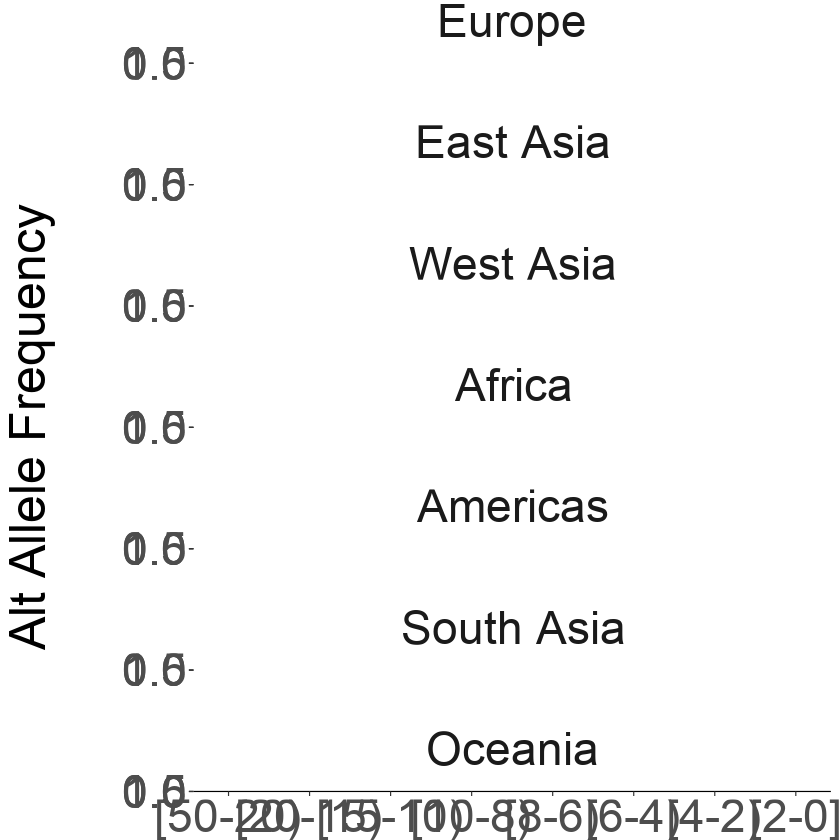

In [77]:
EDAR_positive_selection_variant_example_allele_frequencies_plot <- plot_allele_frequency_trajectories_faceted(EDAR_positive_selection_variant_example_allele_frequencies,'chr2','108,897,145','A','G','rs3827760')
EDAR_positive_selection_variant_example_allele_frequencies_plot

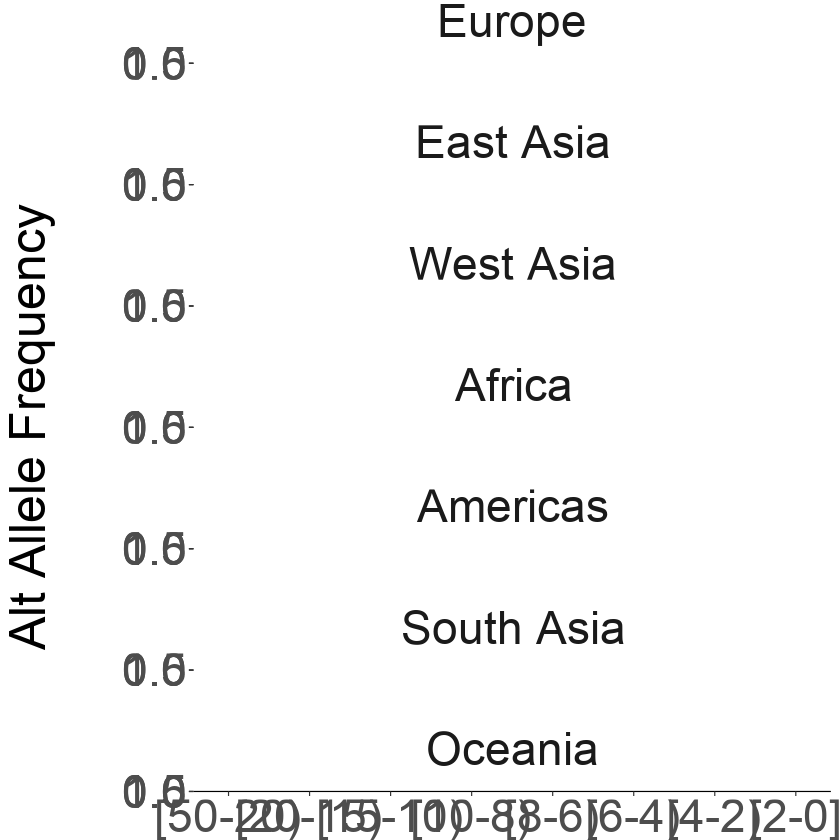

In [78]:
BMI_GWAS_variant_example_allele_frequencies_plot <- plot_allele_frequency_trajectories_faceted(BMI_GWAS_variant_example_allele_frequencies,'chr11','27,673,288','G','A','rs10835211')
BMI_GWAS_variant_example_allele_frequencies_plot

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

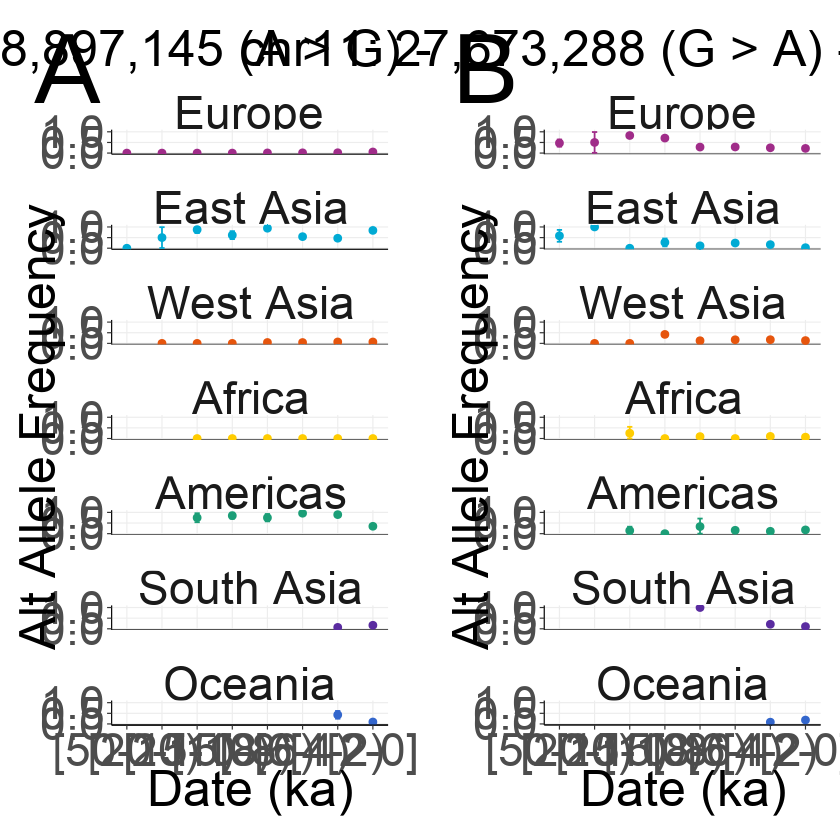

In [79]:
example_allele_frequencies_plot <- plot_grid(EDAR_positive_selection_variant_example_allele_frequencies_plot,
                                             NULL,
                                             BMI_GWAS_variant_example_allele_frequencies_plot,
                                             labels = c('A','','B'),
                                             label_fontface = 'plain',
                                             label_size = 24,
                                             nrow = 1,
                                             rel_widths = c(0.485,0.03,0.485),
                                             scale = 0.95
                                            )

example_allele_frequencies_plot

In [80]:
pdf('figures/main_fig_components/example_allele_frequencies_plot.pdf', height = 10, width = 10)
example_allele_frequencies_plot
dev.off()

png 
  2

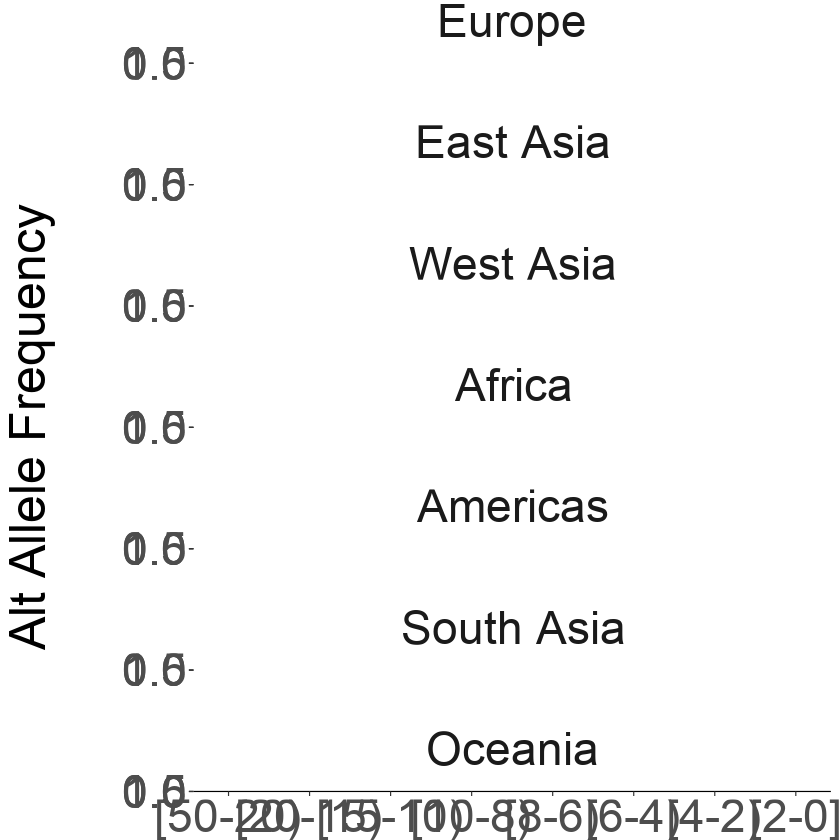

In [81]:
genetic_drift_variant_example_allele_frequencies_plot <- plot_allele_frequency_trajectories_faceted(genetic_drift_variant_example_allele_frequencies,'chr1','153,001,300','T','C','rs3753454')
genetic_drift_variant_example_allele_frequencies_plot

In [82]:
pdf('figures/suppl_figs/genetic_drift_example_allele_frequencies.pdf', height = 10, width = 8)
genetic_drift_variant_example_allele_frequencies_plot
dev.off()

png 
  2

## Selection GWAS Loci Allele Frequency Trajectories <a class = 'anchor' id = 'gwastrajectories'></a>

In [83]:
plot_selection_GWAS_largest_effect_loci_allele_frequency_trajectories_with_legend <- function(file_path, title = NULL, sep = "\t") {
  df <- read.csv(file_path, sep = sep, header = TRUE, stringsAsFactors = FALSE)

  df_long <- df %>%
    pivot_longer(
      cols = -c(rsID, GWAS_beta),
      names_to = 'time_bin',
      values_to = 'allele_frequency'
    )

  df_long$GWAS_beta_clipped <- abs(df_long$GWAS_beta)
  df_long$GWAS_beta_clipped <- pmin(df_long$GWAS_beta_clipped, 0.05)
  
  df_long$time_bin <- gsub("^X", "", df_long$time_bin)      # Remove R's X prefix
  df_long$time_bin <- gsub("\\.", "-", df_long$time_bin)    # Replace dots with dashes if present
  
  bin_levels <- sort(unique(df_long$time_bin))
  bin_labels <- sapply(seq_along(bin_levels), function(i) {
    paste0("[", i-1, "–", i, ")")
  })
  
  df_long$time_bin <- factor(df_long$time_bin,
                             levels = bin_levels,
                             labels = bin_labels)
    
  plot <- ggplot(df_long, aes(x = time_bin, y = allele_frequency,
                           group = rsID, color = GWAS_beta_clipped)) +
    geom_line(alpha = 0.7) +
    geom_point(size = 1) +
    scale_color_gradient2(
      low = '#fff5f0',
      high = 'red',
      limits = c(0, 0.05),
      name = '|GWAS Beta|',
      breaks = c(0, 0.025, 0.05),
      labels = c('0', '0.025', '0.05'),
      guide = guide_colorbar(direction = "horizontal", barwidth = 15, barheight = 0.8)
    ) +
    fig_theme + 
    theme_minimal(base_size = 14) +
    theme(axis.line.x.bottom = element_line(size = (0.125/0.377)),
          axis.line.y.left = element_line(size = (0.125/0.377)),
          axis.title = element_text(size = 12),
          axis.text.x = element_text(size = 11),
          axis.text.y = element_text(size = 11),
          axis.ticks = element_line(size = (0.125/0.377)),
          axis.title.x = element_text(margin = margin(b = 0, l = 0, r = 0, t = 15)),
          axis.title.y = element_text(margin = margin(b = 0, l = 0, r = 15, t = 0)),
          legend.position = 'bottom',
          legend.spacing.x = unit(0.2, 'cm'),
          legend.text = element_text(family = 'Arial', margin = margin(r = 15, unit = 'pt'), size = 11),
          text = element_text(family = 'Arial')
    ) +
    labs(
      x = 'Date (ka)',
      y = 'Trait Increasing Allele Frequency',
      title = title
    )
  
  return(plot)
}

In [84]:
Akbari_et_al_2024_selection_BMI_GWAS_largest_effect_loci_allele_frequencies_plot <- plot_selection_GWAS_largest_effect_loci_allele_frequency_trajectories_with_legend('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/selection_GWAS_loci_allele_frequency_trajectories/Akbari_et_al_2024_selection_BMI_GWAS_largest_effect_loci_proxy_AFs.txt', 'BMI')
legend <- get_legend(Akbari_et_al_2024_selection_BMI_GWAS_largest_effect_loci_allele_frequencies_plot)

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label

In [85]:
plot_selection_GWAS_largest_effect_loci_allele_frequency_trajectories <- function(file_path, title = NULL, sep = "\t") {
  df <- read.csv(file_path, sep = sep, header = TRUE, stringsAsFactors = FALSE)
  
  df_long <- df %>%
    pivot_longer(
      cols = -c(rsID, GWAS_beta),
      names_to = 'time_bin',
      values_to = 'allele_frequency'
    )
  
  df_long$time_bin <- gsub("^X", "", df_long$time_bin)      # Remove R's X prefix
  df_long$time_bin <- gsub("\\.", "-", df_long$time_bin)    # Replace dots with dashes if present
  
  bin_starts <- as.numeric(sub("-.*", "", df_long$time_bin))
  bin_order <- order(bin_starts, decreasing = TRUE)
  bin_levels <- unique(df_long$time_bin[bin_order])
  
  bin_labels <- sapply(seq_along(bin_levels), function(i) {
    paste0("[", length(bin_levels) - i + 1, "-", length(bin_levels) - i, ")")
  })

  df_long$time_bin <- factor(df_long$time_bin,
                             levels = bin_levels,
                             labels = bin_labels)
  
  df_long$GWAS_beta <- pmin(pmax(df_long$GWAS_beta, -0.101), 0.051)


  df_long$GWAS_beta_clipped <- pmin(abs(df_long$GWAS_beta), 0.05)

  plot <- ggplot(df_long, aes(x = time_bin, y = allele_frequency,
                           group = rsID, color = GWAS_beta_clipped)) +
    geom_line(size = 0.7, alpha = 0.6) +
    geom_point(size = 0.8, alpha = 0.6) +
    scale_color_gradient(
        low = '#fff5f0',
        high = 'red',
        limits = c(0, 0.05),
        name = '|GWAS Beta|'
    ) +
    fig_theme +
    theme(
      legend.position = 'none',
      plot.title = element_text(hjust = 0.5, margin = margin(b = 15, t = 0), size = 12)
    ) +
    labs(
      x = 'Date (ka)',
      y = 'Trait Increasing Allele Frequency',
      title = title
    )
    
  return(plot)
}

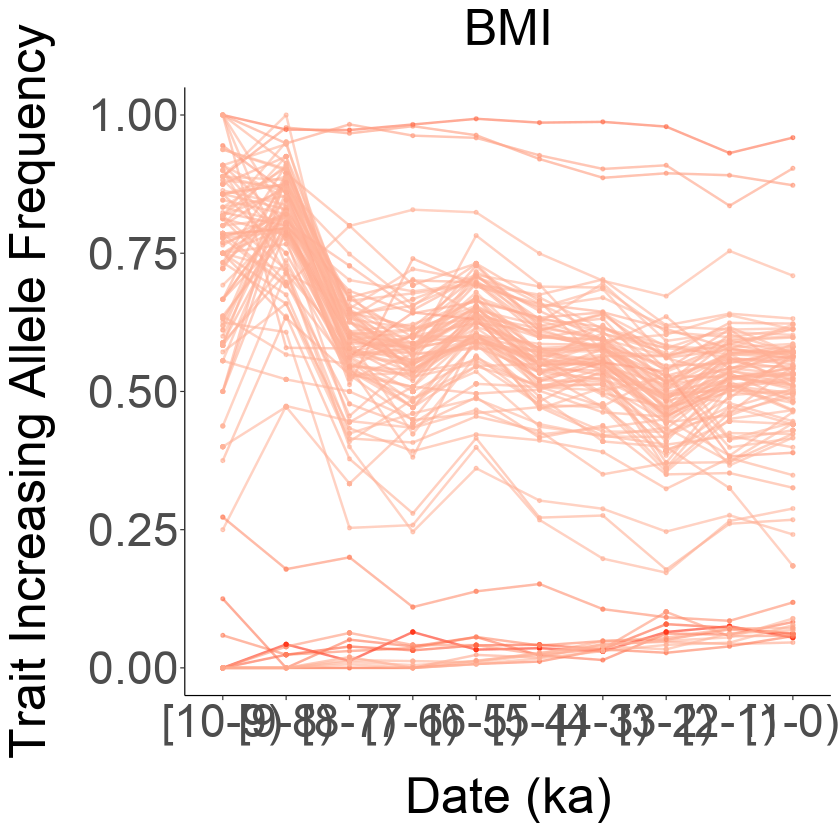

In [86]:
Akbari_et_al_2024_selection_BMI_GWAS_largest_effect_loci_allele_frequencies_plot <- plot_selection_GWAS_largest_effect_loci_allele_frequency_trajectories('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/selection_GWAS_loci_allele_frequency_trajectories/Akbari_et_al_2024_selection_BMI_GWAS_largest_effect_loci_proxy_AFs.txt', 'BMI')
Akbari_et_al_2024_selection_BMI_GWAS_largest_effect_loci_allele_frequencies_plot

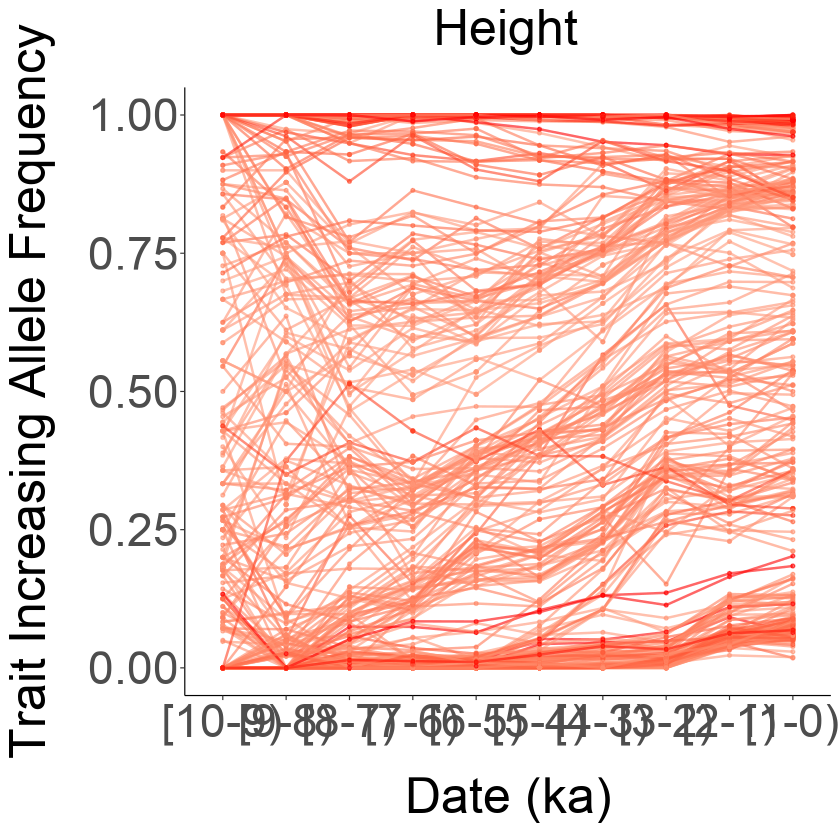

In [87]:
Akbari_et_al_2024_selection_height_GWAS_largest_effect_loci_allele_frequencies_plot <- plot_selection_GWAS_largest_effect_loci_allele_frequency_trajectories('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/selection_GWAS_loci_allele_frequency_trajectories/Akbari_et_al_2024_selection_height_GWAS_largest_effect_loci_proxy_AFs.txt', 'Height')
Akbari_et_al_2024_selection_height_GWAS_largest_effect_loci_allele_frequencies_plot

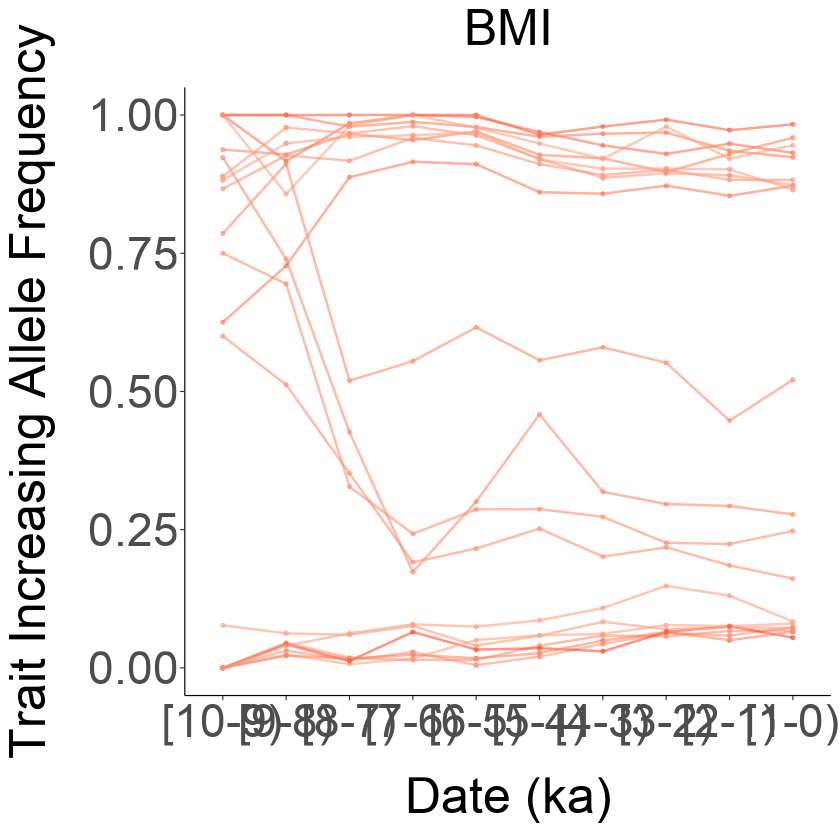

In [88]:
Irving_Pease_et_al_2024_selection_BMI_GWAS_largest_effect_loci_allele_frequencies_plot <- plot_selection_GWAS_largest_effect_loci_allele_frequency_trajectories('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/selection_GWAS_loci_allele_frequency_trajectories/Irving_Pease_et_al_2024_selection_BMI_GWAS_largest_effect_loci_proxy_AFs.txt', 'BMI')
Irving_Pease_et_al_2024_selection_BMI_GWAS_largest_effect_loci_allele_frequencies_plot

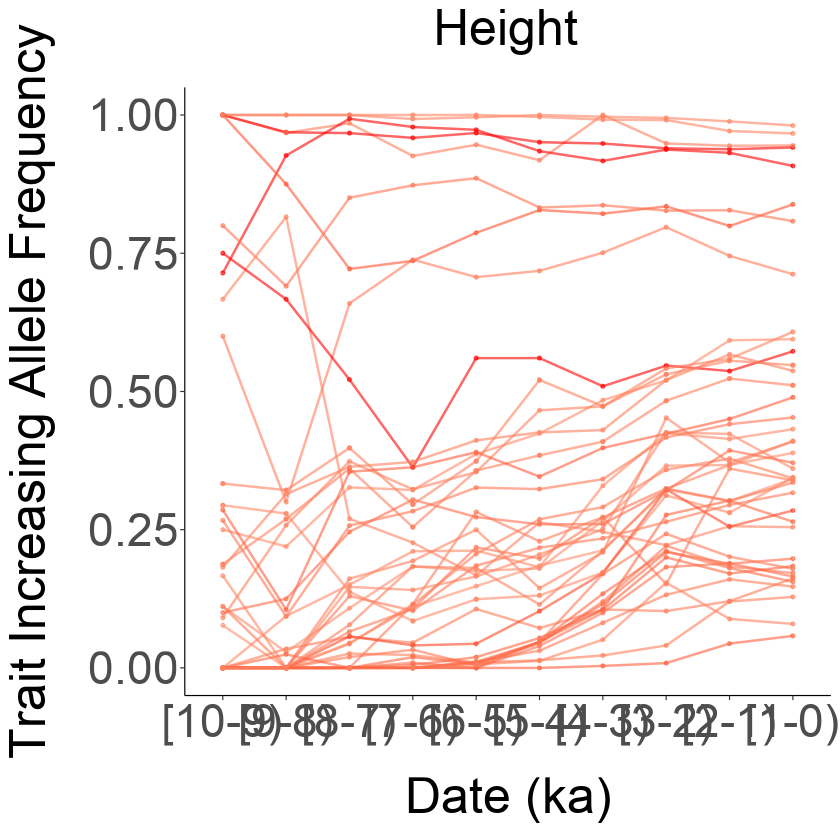

In [89]:
Irving_Pease_et_al_2024_selection_height_GWAS_largest_effect_loci_allele_frequencies_plot <- plot_selection_GWAS_largest_effect_loci_allele_frequency_trajectories('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/selection_GWAS_loci_allele_frequency_trajectories/Irving_Pease_et_al_2024_selection_height_GWAS_largest_effect_loci_proxy_AFs.txt', 'Height')
Irving_Pease_et_al_2024_selection_height_GWAS_largest_effect_loci_allele_frequencies_plot

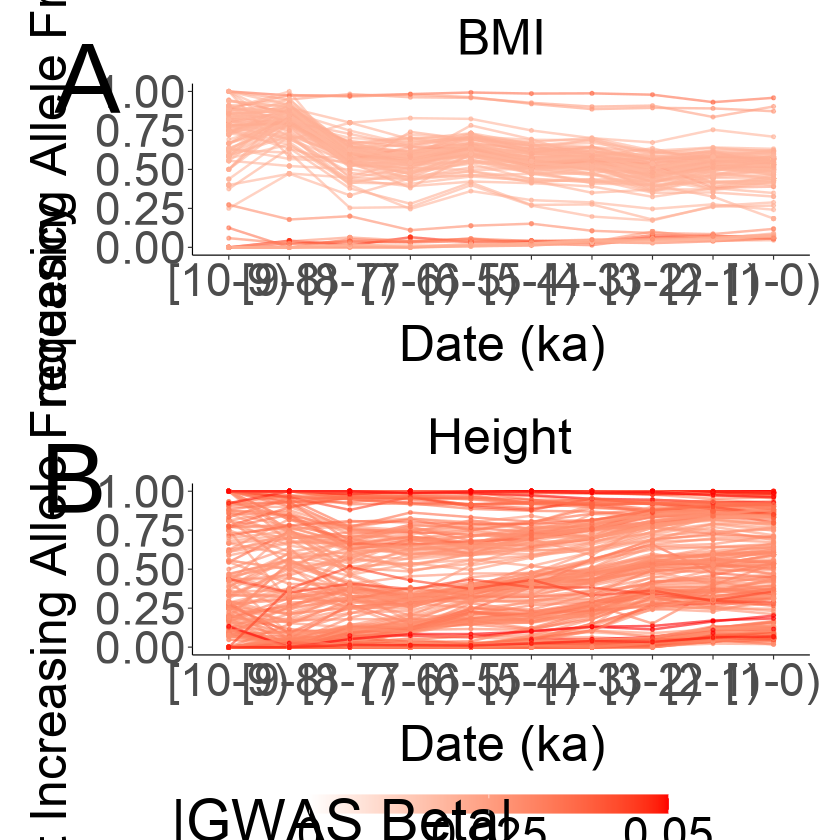

In [90]:
top_row <- plot_grid(Akbari_et_al_2024_selection_BMI_GWAS_largest_effect_loci_allele_frequencies_plot,
                     label_fontface = 'plain',
                     label_size = 24,
                     labels = c('A'),
                     nrow = 1
            )

middle_row <- plot_grid(Akbari_et_al_2024_selection_height_GWAS_largest_effect_loci_allele_frequencies_plot,
                        label_fontface = 'plain',
                        label_size = 24,
                        labels = c('B'),
                        nrow = 1
                )

bottom_row <- plot_grid(legend,
                        nrow = 1
                       )

Akbari_et_al_2024_selection_GWAS_largest_effect_loci_allele_frequencies_plot <- plot_grid(top_row,
                  NULL,
                  middle_row,
                  NULL,
                  bottom_row,
                  ncol = 1,
                  rel_heights = c(0.475,0.02,0.475,0.02,0.05),
                  scale = 0.95
        )

Akbari_et_al_2024_selection_GWAS_largest_effect_loci_allele_frequencies_plot

In [91]:
pdf('figures/suppl_figs/Akbari_et_al_2024_selection_GWAS_largest_effect_loci_allele_frequencies.pdf', height = 10, width = 10)
Akbari_et_al_2024_selection_GWAS_largest_effect_loci_allele_frequencies_plot
dev.off()

png 
  2

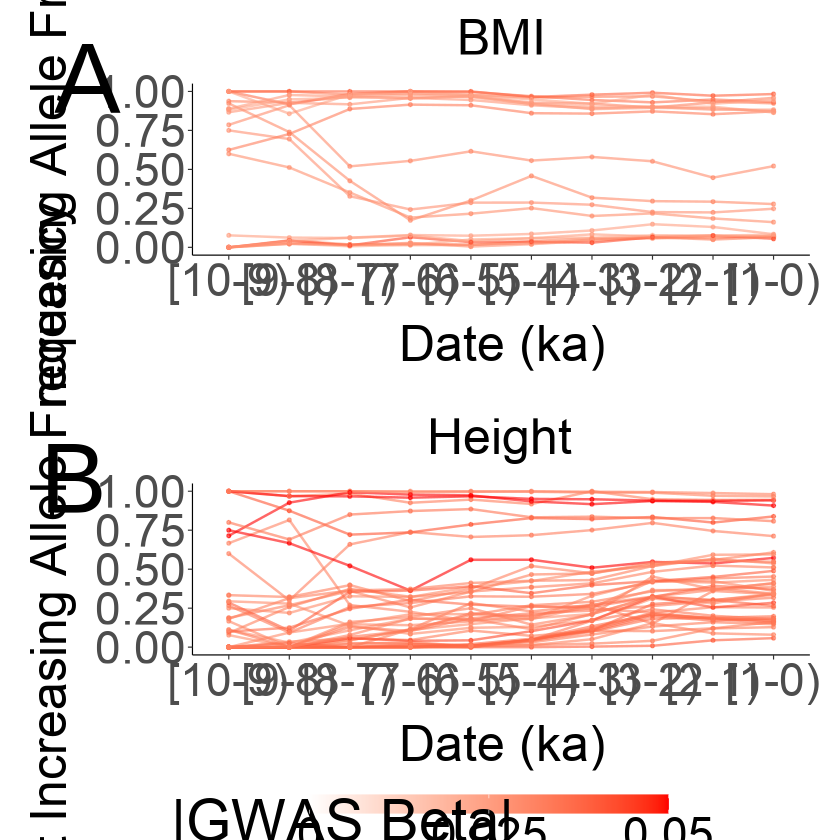

In [92]:
top_row <- plot_grid(Irving_Pease_et_al_2024_selection_BMI_GWAS_largest_effect_loci_allele_frequencies_plot,
                     label_fontface = 'plain',
                     label_size = 24,
                     labels = c('A'),
                     nrow = 1
            )

middle_row <- plot_grid(Irving_Pease_et_al_2024_selection_height_GWAS_largest_effect_loci_allele_frequencies_plot,
                        label_fontface = 'plain',
                        label_size = 24,
                        labels = c('B'),
                        nrow = 1
                )

bottom_row <- plot_grid(legend,
                        nrow = 1
                       )

Irving_Pease_et_al_2024_selection_GWAS_largest_effect_loci_allele_frequencies_plot <- plot_grid(top_row,
                  NULL,
                  middle_row,
                  NULL,
                  bottom_row,
                  ncol = 1,
                  rel_heights = c(0.475,0.02,0.475,0.02,0.05),
                  scale = 0.95
        )

Irving_Pease_et_al_2024_selection_GWAS_largest_effect_loci_allele_frequencies_plot

In [93]:
pdf('figures/main_fig_components/Irving_Pease_et_al_2024_selection_GWAS_largest_effect_loci_allele_frequencies.pdf', height = 10, width = 10)
Irving_Pease_et_al_2024_selection_GWAS_largest_effect_loci_allele_frequencies_plot
dev.off()

png 
  2

In [94]:
plot_selection_GWAS_strongest_p_value_loci_allele_frequency_trajectories_with_legend <- function(file_path, title = NULL, sep = "\t") {
  df <- read.csv(file_path, sep = sep, header = TRUE, stringsAsFactors = FALSE)

  df_long <- df %>%
    pivot_longer(
      cols = -c(rsID, GWAS_beta, GWAS_p_value),
      names_to = 'time_bin',
      values_to = 'allele_frequency'
    )
  
  df_long$time_bin <- gsub("^X", "", df_long$time_bin)      # Remove R's X prefix
  df_long$time_bin <- gsub("\\.", "-", df_long$time_bin)    # Replace dots with dashes if present
  
  bin_starts <- as.numeric(sub("-.*", "", df_long$time_bin))
  bin_order <- order(bin_starts, decreasing = TRUE)
  bin_levels <- unique(df_long$time_bin[bin_order])
  
  bin_labels <- sapply(seq_along(bin_levels), function(i) {
    paste0("[", length(bin_levels) - i + 1, "-", length(bin_levels) - i, ")")
  })

  df_long$time_bin <- factor(df_long$time_bin,
                             levels = bin_levels,
                             labels = bin_labels)

  df_long$log10_p <- -log10(df_long$GWAS_p_value)

  plot <- ggplot(df_long, aes(x = time_bin, y = allele_frequency,
                           group = rsID, color = log10_p)) +
    geom_line(size = 0.7, alpha = 0.6) +
    geom_point(size = 0.8, alpha = 0.6) +
    scale_color_gradient(
        low = '#fff5f0',
        high = 'red',
        limits = c(0, 40),
        oob = scales::squish,
        na.value = 'red',
        name = 'log10(P)'
    ) +
    fig_theme + 
    theme_minimal(base_size = 14) +
    theme(axis.line.x.bottom = element_line(size = (0.125/0.377)),
          axis.line.y.left = element_line(size = (0.125/0.377)),
          axis.title = element_text(size = 12),
          axis.text.x = element_text(size = 11),
          axis.text.y = element_text(size = 11),
          axis.ticks = element_line(size = (0.125/0.377)),
          axis.title.x = element_text(margin = margin(b = 0, l = 0, r = 0, t = 15)),
          axis.title.y = element_text(margin = margin(b = 0, l = 0, r = 15, t = 0)),
          legend.position = 'bottom',
          legend.spacing.x = unit(0.2, 'cm'),
          legend.text = element_text(family = 'Arial', margin = margin(r = 15, unit = 'pt'), size = 11),
          text = element_text(family = 'Arial')
    ) +
    labs(
      x = 'Date (ka)',
      y = 'Trait Increasing Allele Frequency',
      title = title
    )
  
  return(plot)
}

In [95]:
Akbari_et_al_2024_selection_BMI_GWAS_strongest_p_value_loci_allele_frequencies_plot <- plot_selection_GWAS_strongest_p_value_loci_allele_frequency_trajectories_with_legend('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/selection_GWAS_loci_allele_frequency_trajectories/Akbari_et_al_2024_selection_BMI_GWAS_strongest_p_value_loci_proxy_AFs.txt', 'BMI')
legend <- get_legend(Akbari_et_al_2024_selection_BMI_GWAS_strongest_p_value_loci_allele_frequencies_plot)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

In [96]:
plot_selection_GWAS_strongest_p_value_loci_allele_frequency_trajectories <- function(file_path, title = NULL, sep = "\t") {
  df <- read.csv(file_path, sep = sep, header = TRUE, stringsAsFactors = FALSE)

  df_long <- df %>%
    pivot_longer(
      cols = -c(rsID, GWAS_beta, GWAS_p_value),
      names_to = 'time_bin',
      values_to = 'allele_frequency'
    )
  
  df_long$time_bin <- gsub("^X", "", df_long$time_bin)      # Remove R's X prefix
  df_long$time_bin <- gsub("\\.", "-", df_long$time_bin)    # Replace dots with dashes if present
  
  bin_starts <- as.numeric(sub("-.*", "", df_long$time_bin))
  bin_order <- order(bin_starts, decreasing = TRUE)
  bin_levels <- unique(df_long$time_bin[bin_order])
  
  bin_labels <- sapply(seq_along(bin_levels), function(i) {
    paste0("[", length(bin_levels) - i + 1, "-", length(bin_levels) - i, ")")
  })

  df_long$time_bin <- factor(df_long$time_bin,
                             levels = bin_levels,
                             labels = bin_labels)

  df_long$log10_p <- -log10(df_long$GWAS_p_value)

  plot <- ggplot(df_long, aes(x = time_bin, y = allele_frequency,
                           group = rsID, color = log10_p)) +
    geom_line(size = 0.7, alpha = 0.6) +
    geom_point(size = 0.8, alpha = 0.6) +
    scale_color_gradient(
        low = '#fff5f0',
        high = 'red',
        limits = c(0, 40),
        oob = scales::squish,
        na.value = 'red',
        name = expression(-log[10]~"p")
    ) +
    fig_theme +
    theme(
      legend.position = 'none',
      plot.title = element_text(hjust = 0.5, margin = margin(b = 15, t = 0), size = 12)
    ) +
    labs(
      x = 'Date (ka)',
      y = 'Trait Increasing Allele Frequency',
      title = title
    )
  
  return(plot)
}

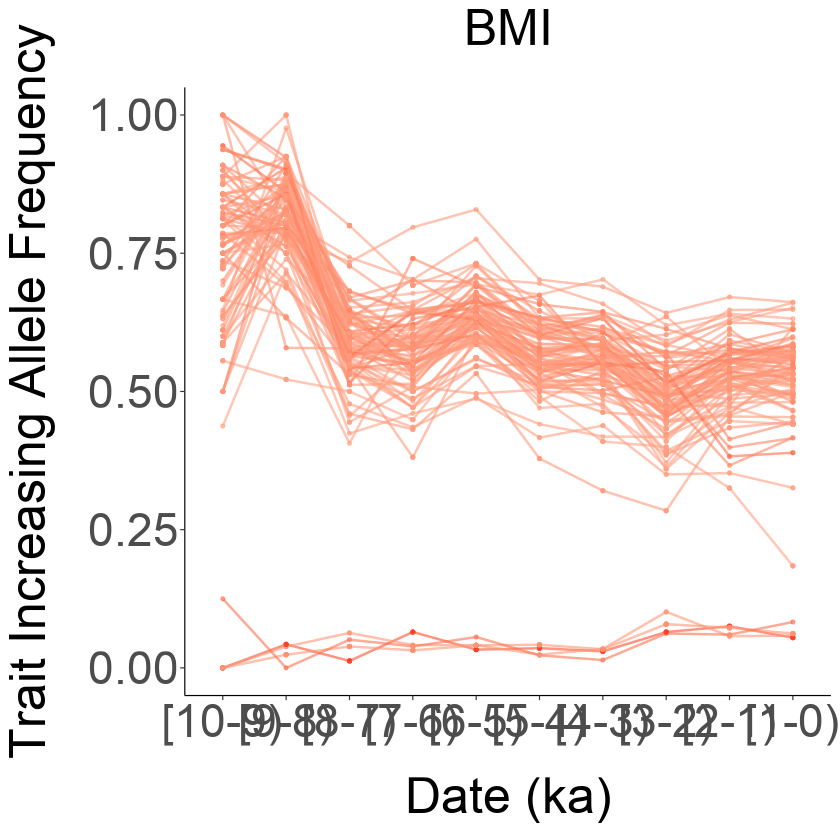

In [97]:
Akbari_et_al_2024_selection_BMI_GWAS_strongest_p_value_loci_allele_frequencies_plot <- plot_selection_GWAS_strongest_p_value_loci_allele_frequency_trajectories('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/selection_GWAS_loci_allele_frequency_trajectories/Akbari_et_al_2024_selection_BMI_GWAS_strongest_p_value_loci_proxy_AFs.txt', 'BMI')
Akbari_et_al_2024_selection_BMI_GWAS_strongest_p_value_loci_allele_frequencies_plot

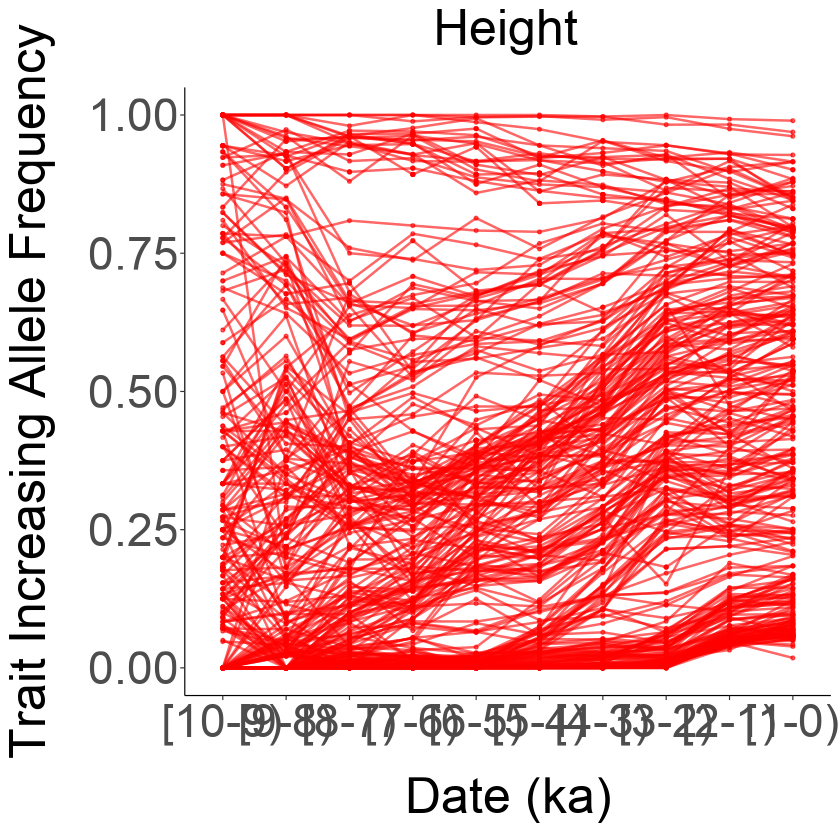

In [98]:
Akbari_et_al_2024_selection_height_GWAS_strongest_p_value_loci_allele_frequencies_plot <- plot_selection_GWAS_strongest_p_value_loci_allele_frequency_trajectories('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/selection_GWAS_loci_allele_frequency_trajectories/Akbari_et_al_2024_selection_height_GWAS_strongest_p_value_loci_proxy_AFs.txt', 'Height')
Akbari_et_al_2024_selection_height_GWAS_strongest_p_value_loci_allele_frequencies_plot

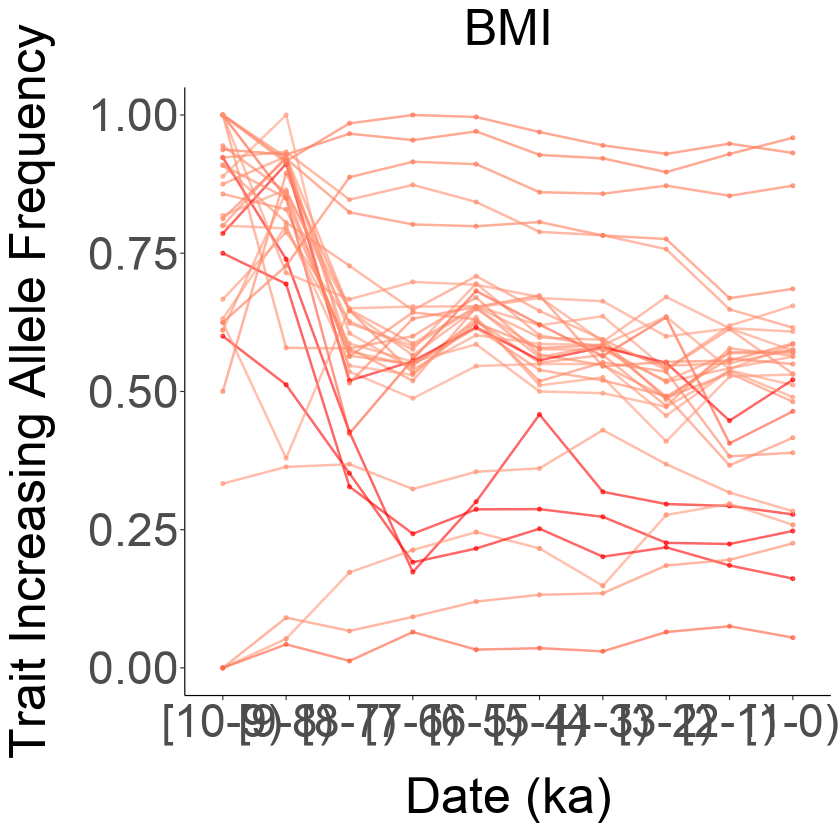

In [99]:
Irving_Pease_et_al_2024_selection_BMI_GWAS_strongest_p_value_loci_allele_frequencies_plot <- plot_selection_GWAS_strongest_p_value_loci_allele_frequency_trajectories('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/selection_GWAS_loci_allele_frequency_trajectories/Irving_Pease_et_al_2024_selection_BMI_GWAS_strongest_p_value_loci_proxy_AFs.txt', 'BMI')
Irving_Pease_et_al_2024_selection_BMI_GWAS_strongest_p_value_loci_allele_frequencies_plot

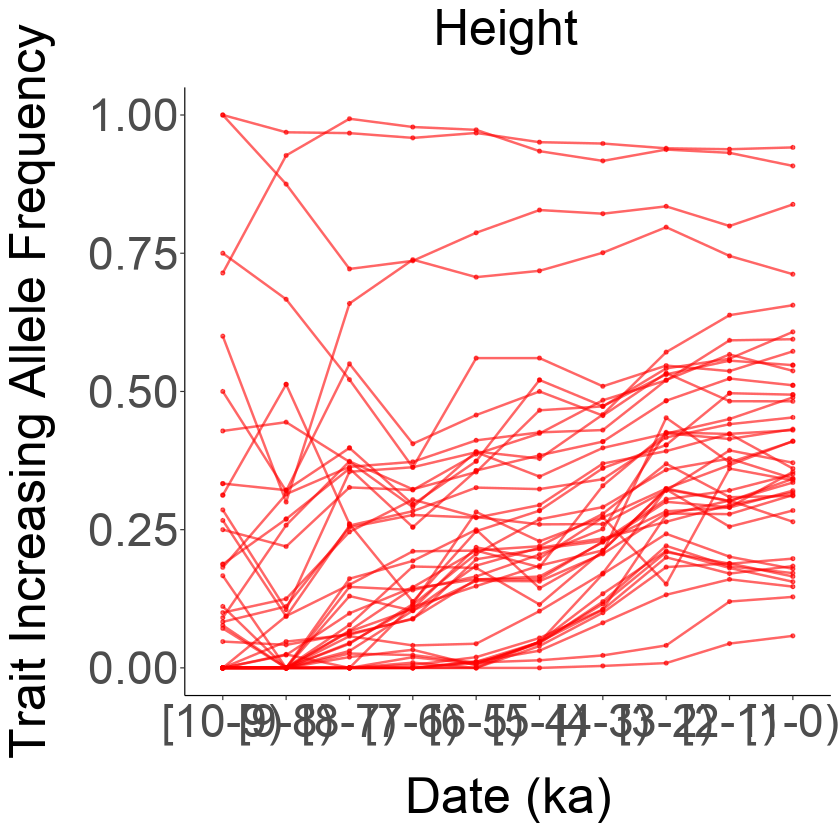

In [100]:
Irving_Pease_et_al_2024_selection_height_GWAS_strongest_p_value_loci_allele_frequencies_plot <- plot_selection_GWAS_strongest_p_value_loci_allele_frequency_trajectories('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/selection_GWAS_loci_allele_frequency_trajectories/Irving_Pease_et_al_2024_selection_height_GWAS_strongest_p_value_loci_proxy_AFs.txt', 'Height')
Irving_Pease_et_al_2024_selection_height_GWAS_strongest_p_value_loci_allele_frequencies_plot

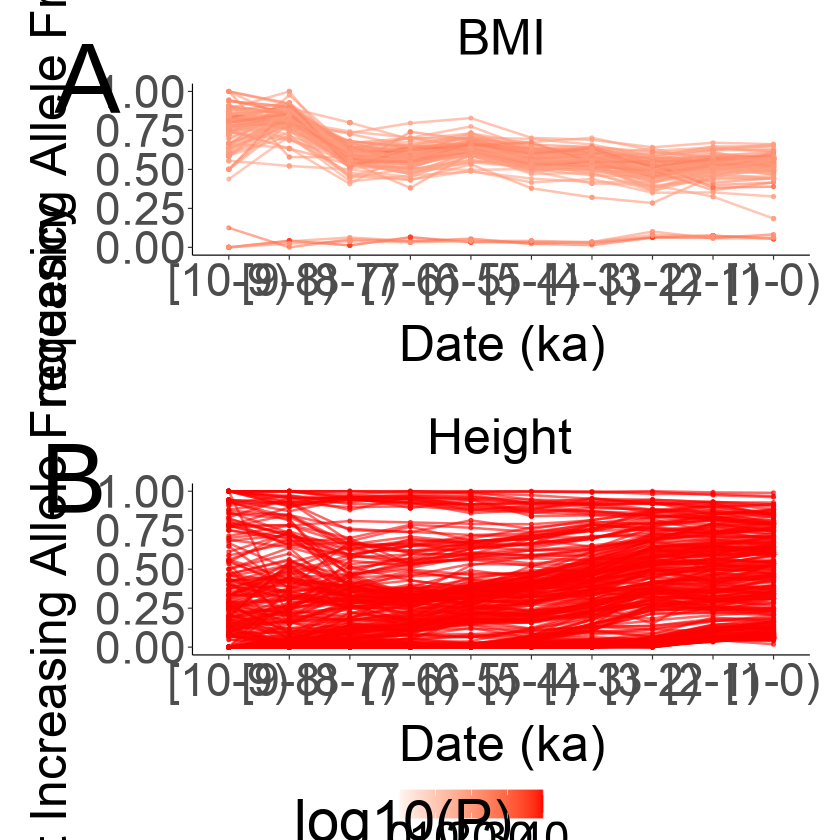

In [101]:
top_row <- plot_grid(Akbari_et_al_2024_selection_BMI_GWAS_strongest_p_value_loci_allele_frequencies_plot,
                     label_fontface = 'plain',
                     label_size = 24,
                     labels = c('A'),
                     nrow = 1
            )

middle_row <- plot_grid(Akbari_et_al_2024_selection_height_GWAS_strongest_p_value_loci_allele_frequencies_plot,
                        label_fontface = 'plain',
                        label_size = 24,
                        labels = c('B'),
                        nrow = 1
                )

bottom_row <- plot_grid(legend,
                        nrow = 1
                       )

Akbari_et_al_2024_selection_GWAS_strongest_p_value_loci_allele_frequencies_plot <- plot_grid(top_row,
                  NULL,
                  middle_row,
                  NULL,
                  bottom_row,
                  ncol = 1,
                  rel_heights = c(0.475,0.02,0.475,0.02,0.05),
                  scale = 0.95
        )

Akbari_et_al_2024_selection_GWAS_strongest_p_value_loci_allele_frequencies_plot

In [102]:
pdf('figures/suppl_figs/Akbari_et_al_2024_selection_GWAS_strongest_p_value_loci_allele_frequencies.pdf', height = 10, width = 10)
Akbari_et_al_2024_selection_GWAS_strongest_p_value_loci_allele_frequencies_plot
dev.off()

png 
  2

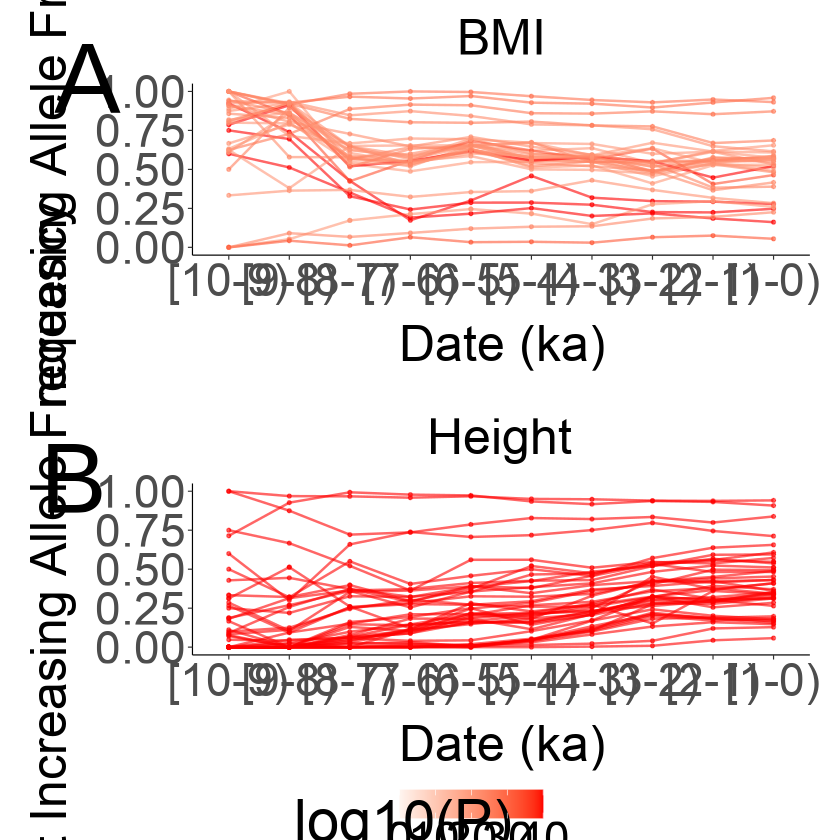

In [103]:
top_row <- plot_grid(Irving_Pease_et_al_2024_selection_BMI_GWAS_strongest_p_value_loci_allele_frequencies_plot,
                     label_fontface = 'plain',
                     label_size = 24,
                     labels = c('A'),
                     nrow = 1
            )

middle_row <- plot_grid(Irving_Pease_et_al_2024_selection_height_GWAS_strongest_p_value_loci_allele_frequencies_plot,
                        label_fontface = 'plain',
                        label_size = 24,
                        labels = c('B'),
                        nrow = 1
                )

bottom_row <- plot_grid(legend,
                        nrow = 1
                       )

Irving_Pease_et_al_2024_selection_GWAS_strongest_p_value_loci_allele_frequencies_plot <- plot_grid(top_row,
                  NULL,
                  middle_row,
                  NULL,
                  bottom_row,
                  ncol = 1,
                  rel_heights = c(0.475,0.02,0.475,0.02,0.05),
                  scale = 0.95
        )

Irving_Pease_et_al_2024_selection_GWAS_strongest_p_value_loci_allele_frequencies_plot

In [104]:
pdf('figures/suppl_figs/Irving_Pease_et_al_2024_selection_GWAS_strongest_p_value_loci_allele_frequencies.pdf', height = 10, width = 10)
Irving_Pease_et_al_2024_selection_GWAS_strongest_p_value_loci_allele_frequencies_plot
dev.off()

png 
  2

## HGD Quality Scores vs. Allele Age <a class = 'anchor' id = 'hgdqualityscoresvsalleleage'></a>

In [105]:
AGVs_in_HGD <- read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/AGV_age_estimates/AGVs_with_age_estimates_and_AFs.txt.gz', sep = '\t', header = TRUE)
head(AGVs_in_HGD)

VariantID  Chromosome Position AlleleRef AlleleAlt AlleleAnc DataSource
1 rs3094315  1          752566   G         A         .         TGP       
2 rs12124819 1          776546   A         G         .         TGP       
3 rs28765502 1          832918   T         C         .         TGP       
4 rs7419119  1          842013   T         G         T         TGP       
5 rs950122   1          846864   G         C         G         Combined  
6 rs950122   1          846864   G         C         G         SGDP      
  NumConcordant NumDiscordant AgeMode_Mut ⋯ AgeCI95Lower_Rec AgeCI95Upper_Rec
1 500           499           16898.80    ⋯ 33318.00         37869.20        
2 500           500            3174.73    ⋯  3447.67          4001.91        
3 500           500           20220.90    ⋯ 20533.80         23742.50        
4 500           493           15138.10    ⋯ 17682.10         21921.70        
5 600           598           22844.60    ⋯ 34031.90         39214.90        
6 100           100           18216.30    ⋯ 17504.10         26187.70        
  QualScore_Rec AgeMode_Jnt AgeMean_Jnt AgeMedian_Jnt AgeCI95Lower_Jnt
1 0.756         38695.60    38693.70    38660.20      35801.40        
2 0.900          3076.93     3076.79     3074.46       2873.75        
3 0.902         25899.00    25908.10    25874.60      23905.60        
4 0.773         24929.90    24912.10    24859.60      22045.40        
5 0.478         42263.00    42278.60    42226.70      39253.00        
6 0.980         27726.30    27725.10    27591.40      22370.90        
  AgeCI95Upper_Jnt QualScore_Jnt gnomAD_AF
1 41671.00         0.756         0.706299 
2  3286.54         0.892         0.189643 
3 27979.50         0.902         0.372510 
4 27875.00         0.773         0.189768 
5 45386.80         0.478         0.206207 
6 33617.60         0.980         0.206207

In [106]:
quality_score_and_allele_age_plot <- function(clock_name, clock_column_name) {
    main <- ggplot(AGVs_in_HGD, aes(
        x = .data[[clock_column_name]],
        y = AgeMode_Jnt
    )) +
        geom_hex() +
        scale_fill_viridis_c() +
        scale_y_continuous(labels = function(x) format(x, big.mark = ',', scientific = FALSE)) +
        xlab(paste(clock_name, 'Quality Score')) + 
        ylab('Variant Age (generations)') +
        fig_theme

    xdens <- axis_canvas(main, axis = 'x') + geom_density(data = AGVs_in_HGD, aes(x = .data[[clock_column_name]]), fill = 'grey', color = 'black', size = (0.125/0.377))
    ydens <- axis_canvas(main, axis = 'y', coord_flip = TRUE) + geom_density(data = AGVs_in_HGD, aes(x = AgeMode_Jnt), fill = 'grey', color = 'black', size = (0.125/0.377)) + coord_flip()
    
    p1 <- insert_xaxis_grob(main, xdens, grid::unit(.2, 'null'), position = 'top')
    p2 <- insert_yaxis_grob(p1, ydens, grid::unit(.2, 'null'), position = 'right')
    ggdraw(p2)
}

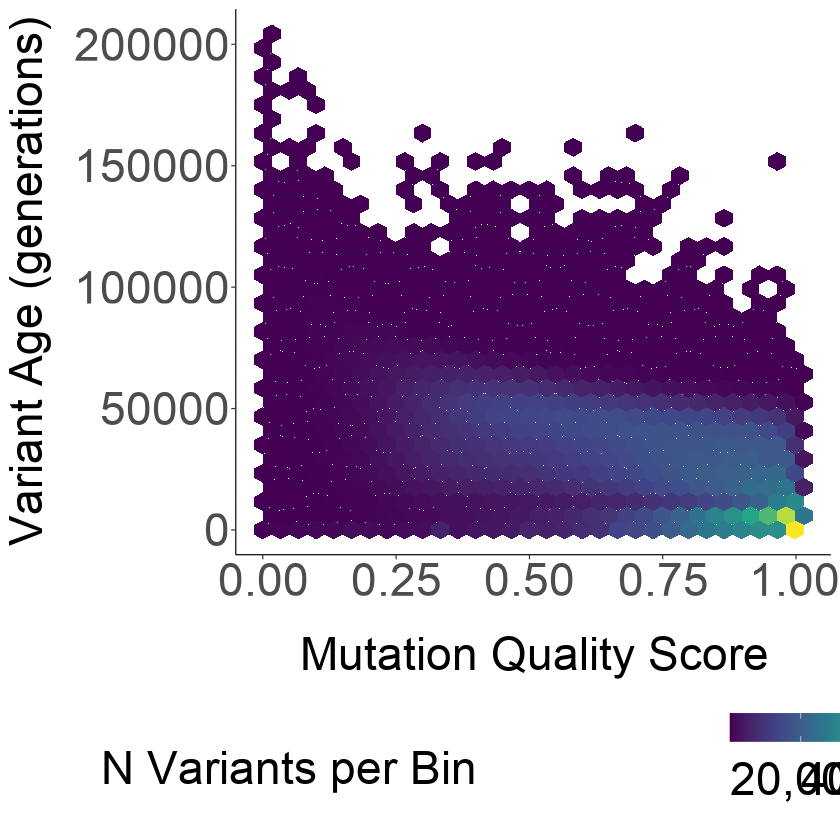

In [107]:
plot_for_legend <- ggplot(AGVs_in_HGD, aes(
    x = QualScore_Mut,
    y = AgeMode_Jnt
)) +
    geom_hex() +
    scale_fill_viridis_c(labels = function(x) format(x, big.mark = ',', scientific = FALSE)) +
    xlab('Mutation Quality Score') +
    ylab('Variant Age (generations)') +
    labs(fill = 'N Variants per Bin') +
    theme_classic() +
    theme(axis.line.x.bottom = element_line(size = (0.125/0.377)),
          axis.line.y.left = element_line(size = (0.125/0.377)),
          axis.text.x = element_text(size = 11),
          axis.text.y = element_text(size = 11),
          axis.ticks = element_line(size = (0.125/0.377)), 
          axis.title.x = element_text(margin = margin(b = 0, l = 0, r = 0, t = 15)),
          axis.title.y = element_text(margin = margin(b = 0, l = 0, r = 10, t = 0)),
          legend.box = 'vertical',
          legend.key.width = unit(1, 'cm'),
          legend.position = 'bottom',
          legend.text = element_text(size = 11),
          legend.title = element_text(size = 11),
          plot.title = element_text(hjust = 0.5, margin = margin(b = 30, l = 0, r = 0, t = 0), size = 12), text = element_text(family = 'Arial'))

plot_for_legend

In [108]:
legend <- get_legend(plot_for_legend)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

In [109]:
mutation_clock_quality_scores_and_allele_age_plot <- quality_score_and_allele_age_plot('Mutation Clock', 'QualScore_Mut')
recombination_clock_quality_scores_and_allele_age_plot <- quality_score_and_allele_age_plot('Recombination Clock', 'QualScore_Rec')
joint_clock_quality_scores_and_allele_age_plot <- quality_score_and_allele_age_plot('Joint Clock', 'QualScore_Jnt')

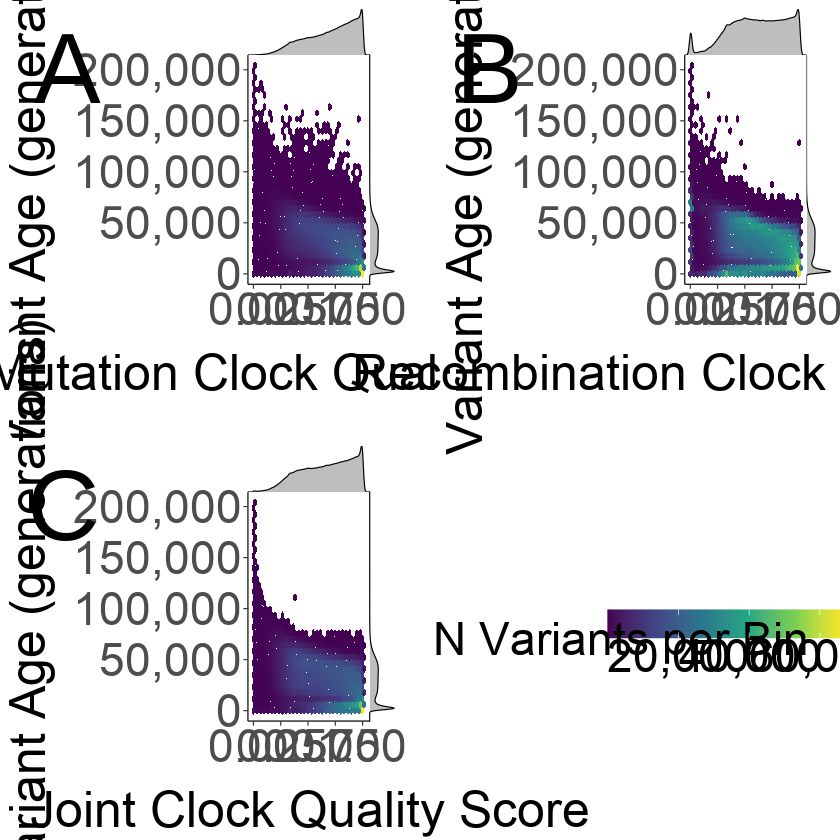

In [110]:
top_row <- plot_grid(mutation_clock_quality_scores_and_allele_age_plot,
                     NULL,
                     recombination_clock_quality_scores_and_allele_age_plot,
                     label_size = 24,
                     label_fontface = 'plain',
                     labels = c('A','','B'),
                     rel_widths = c(0.48,0.04,0.48),
                     nrow = 1
                    )

bottom_row <- plot_grid(joint_clock_quality_scores_and_allele_age_plot,
                        NULL,
                        legend,
                        label_size = 24,
                        label_fontface = 'plain',
                        labels = c('C','',''),
                        rel_widths = c(0.48,0.04,0.48),
                        nrow = 1
                       )

plot <- plot_grid(top_row,
                  NULL,
                  bottom_row,
                  ncol = 1,
                  rel_heights = c(0.48,0.04,0.48)
                 )

plot

In [111]:
pdf('figures/suppl_figs/HGD_quality_scores_and_allele_ages.pdf', height = 8, width = 8)
plot
dev.off()

png 
  2

## HGD Allele Age by Data Source <a class = 'anchor' id = 'hgdalleleagebydatasource'></a>

In [112]:
high_quality_AGV_age_estimates_with_three_estimates <- AGVs_in_HGD %>% group_by(VariantID) %>% filter(n() == 3 & all(QualScore_Jnt >= 0.5)) %>% ungroup()
head(high_quality_AGV_age_estimates_with_three_estimates)

VariantID   Chromosome Position AlleleRef AlleleAlt AlleleAnc DataSource
1 rs113171913 1          869303   C         T         C         Combined  
2 rs113171913 1          869303   C         T         C         SGDP      
3 rs113171913 1          869303   C         T         C         TGP       
4 rs13302957  1          891021   G         A         G         Combined  
5 rs13302957  1          891021   G         A         G         SGDP      
6 rs13302957  1          891021   G         A         G         TGP       
  NumConcordant NumDiscordant AgeMode_Mut ⋯ AgeCI95Lower_Rec AgeCI95Upper_Rec
1 599           596           13319.2     ⋯ 19804.90         23671.5         
2 100            99           12011.4     ⋯  7217.44         10000.0         
3 499           497           13712.1     ⋯ 19320.30         23277.9         
4 600           597           20553.1     ⋯ 36583.80         40554.5         
5 100            99           17009.7     ⋯ 29966.00         39861.4         
6 500           498           21019.7     ⋯ 37049.10         41401.7         
  QualScore_Rec AgeMode_Jnt AgeMean_Jnt AgeMedian_Jnt AgeCI95Lower_Jnt
1 0.768         17446.50    17444.7     17428.10      15969.4         
2 0.929          9788.59     9775.1      9747.98       8186.3         
3 0.922         26070.40    26072.4     26039.30      23558.9         
4 0.765         41907.30    41912.1     41879.40      39630.1         
5 0.848         39807.30    39791.1     39659.70      34121.6         
6 0.749         42277.10    42285.3     42247.80      39804.0         
  AgeCI95Upper_Jnt QualScore_Jnt gnomAD_AF
1 18960.1          0.923         0.0855078
2 11463.7          0.929         0.0855078
3 28644.0          0.922         0.0855078
4 44256.5          0.765         0.8851160
5 45840.6          0.848         0.8851160
6 44841.7          0.749         0.8851160

In [113]:
nrow(high_quality_AGV_age_estimates_with_three_estimates)/3

[1] 637502

In [114]:
high_quality_AGV_age_estimates_with_three_estimates %>% group_by(DataSource) %>% summarise_at(vars(AgeMode_Jnt), list(mean = mean))

DataSource mean    
1 Combined   23841.76
2 SGDP       22026.79
3 TGP        24045.82

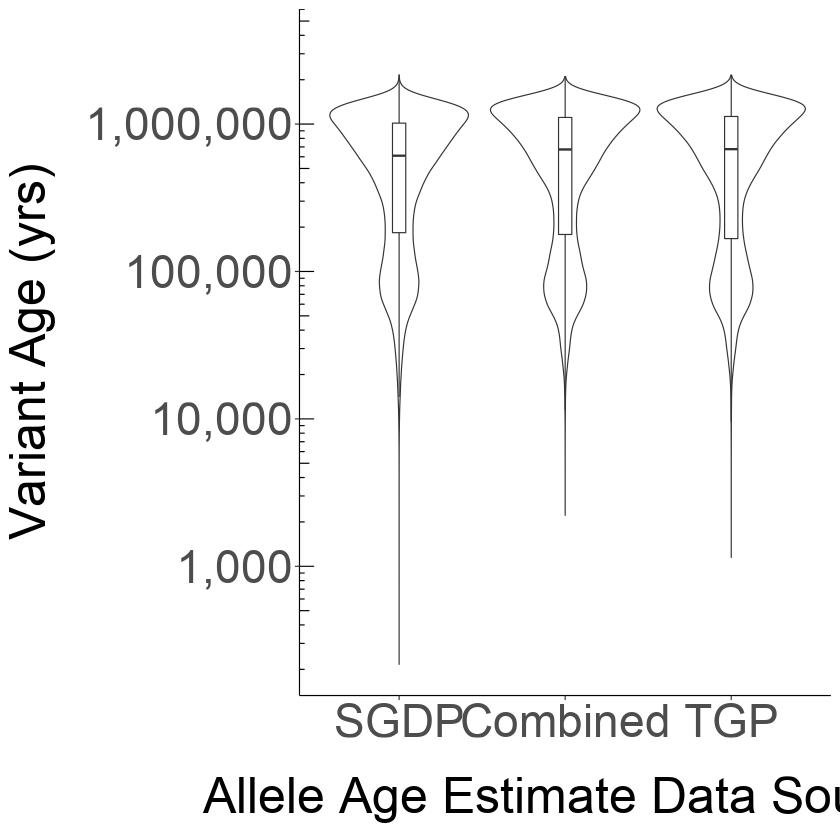

In [115]:
high_quality_AGV_age_estimates_with_three_estimates_plot <- ggplot(high_quality_AGV_age_estimates_with_three_estimates, aes(
    x = factor(DataSource, levels = c('SGDP', 'Combined', 'TGP')),
    y = AgeMode_Jnt*29
)) + 
    geom_violin(alpha = 0.6, fill = 'white', size = (0.125/0.377)) +
    geom_boxplot(fill = 'white', lwd = (0.125/0.377), outlier.shape = NA, width = 0.08) +
    scale_y_continuous(breaks = trans_breaks('log10', function(x) 10^x), labels = scales::comma_format(scale = 1), limits = c(NA,3700000), trans = 'log10') +
    xlab('Allele Age Estimate Data Source') +
    ylab('Variant Age (yrs)') + 
    annotation_logticks(sides = 'l', size = (0.125/0.377)) +
    fig_theme

high_quality_AGV_age_estimates_with_three_estimates_plot 

In [116]:
pdf('figures/suppl_figs/high_quality_AGV_age_estimates_with_three_estimates.pdf', height = 8, width = 8)
high_quality_AGV_age_estimates_with_three_estimates_plot
dev.off()

png 
  2